In [1]:
#import all the necessary python libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import all the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Code to display all rows and columns of the dataset
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
#Importing the application dataset
data = pd.read_csv('application_data.csv', header=0)

In [5]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
#understanding the shape (rows and columns) of the app_dataset
data.shape

(307511, 122)

## Handling Missing Values
#### Checking for null values in the dataset

In [7]:
data.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
#removing the null values more than 40%
value = 100 * data.isna().sum()/len(data)>40
remove = value[value==True].index

In [9]:
data.drop(columns=remove,inplace=True)

In [10]:
# Now let's remove all the unwanted columns from the application data set
data.drop(columns=['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],inplace=True)

Impute the AMT_ANNUITY column as it has minimal null values. As the outlier has higher values, mean cannot be used as it could hamper the analysis. 

Instead we can impute median as it doesn't consider outlier

24903.0


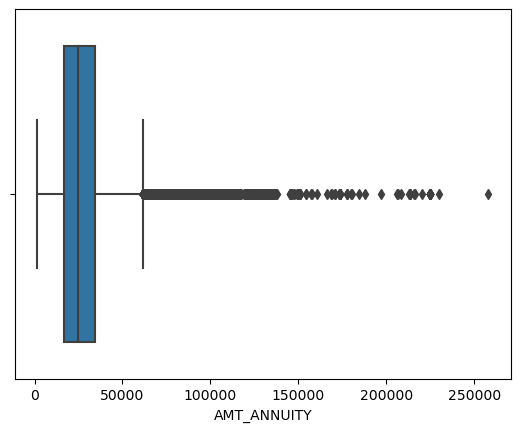

In [11]:
sns.boxplot(data=data,x='AMT_ANNUITY')
print(data.AMT_ANNUITY.median())
data.AMT_ANNUITY.fillna(0.51,inplace=True)

For AMT_GOODS_PRICE

450000.0


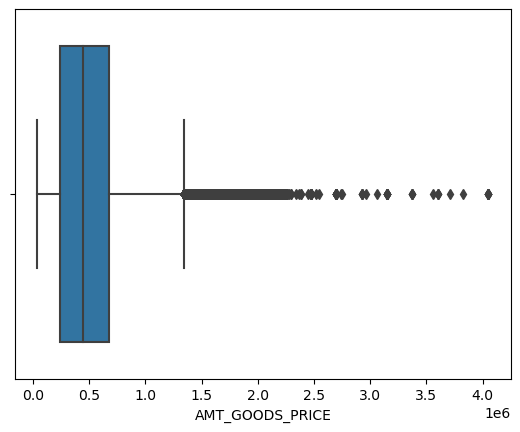

In [12]:
sns.boxplot(data=data,x='AMT_GOODS_PRICE')
print(data.AMT_GOODS_PRICE.median())
data.AMT_GOODS_PRICE.fillna(450000,inplace=True)

For OCCUPATION_TYPE

In [13]:
data.OCCUPATION_TYPE.fillna('Unknown', inplace=True)

For EXT_SOURCE_2

0.51


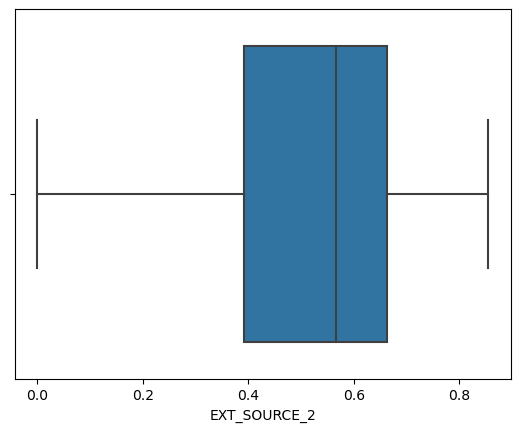

In [14]:
sns.boxplot(data=data,x='EXT_SOURCE_2')
print(round(data.EXT_SOURCE_2.mean(),2))
# We will impute mean in this case since there are no outliers
data.EXT_SOURCE_2.fillna(0.51,inplace=True)

We will impute mean in this case since there are no outliers.

For EXT_SOURCE_3

0.51


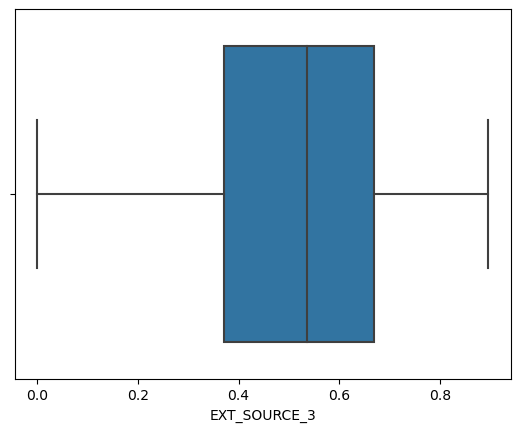

In [15]:
sns.boxplot(data=data,x='EXT_SOURCE_3')
print(round(data.EXT_SOURCE_3.mean(), 2))
data.EXT_SOURCE_3.fillna(0.51,inplace=True)

For AMT_REQ_CREDIT_BUREAU_HOUR

0.01


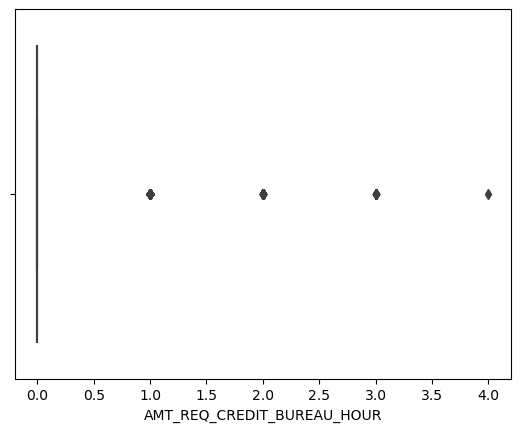

In [16]:
sns.boxplot(data=data,x='AMT_REQ_CREDIT_BUREAU_HOUR')
print(round(data.AMT_REQ_CREDIT_BUREAU_HOUR.mean(), 2))
data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0.51,inplace=True)
plt.show()

For AMT_REQ_CREDIT_BUREAU_DAY

0.0


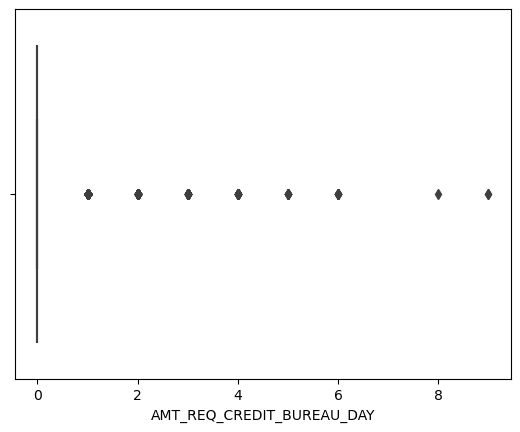

In [17]:
sns.boxplot(data=data,x='AMT_REQ_CREDIT_BUREAU_DAY')
print(round(data.AMT_REQ_CREDIT_BUREAU_DAY.median(),2))
data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0.51,inplace=True)

0.0


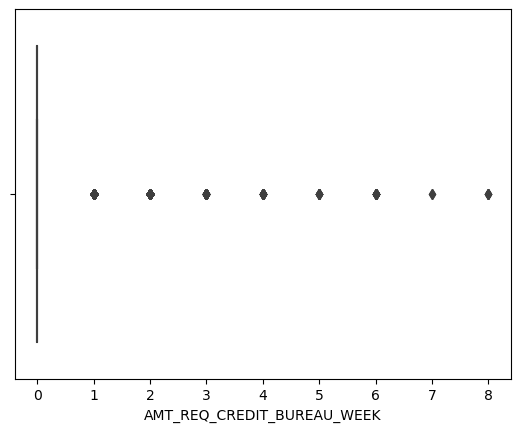

In [18]:
sns.boxplot(data=data,x='AMT_REQ_CREDIT_BUREAU_WEEK')
print(round(data.AMT_REQ_CREDIT_BUREAU_WEEK.median(),2))
data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0.51,inplace=True)

For AMT_REQ_CREDIT_BUREAU_MON

0.0


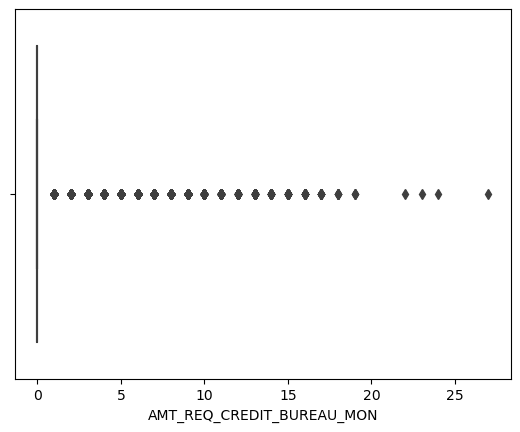

In [19]:
sns.boxplot(data=data,x='AMT_REQ_CREDIT_BUREAU_MON')
print(round(data.AMT_REQ_CREDIT_BUREAU_MON.median(),2))
data.AMT_REQ_CREDIT_BUREAU_MON.fillna(0.51,inplace=True)

0.0


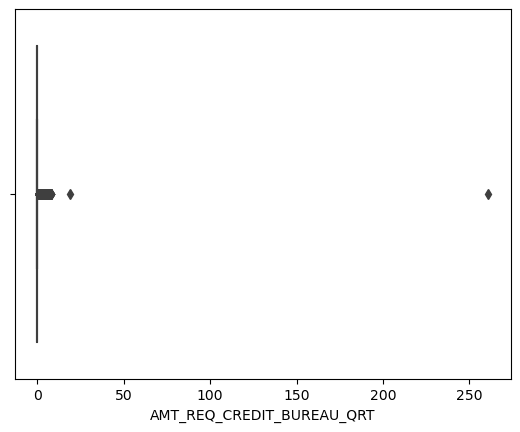

In [20]:
sns.boxplot(data=data,x='AMT_REQ_CREDIT_BUREAU_QRT')
print(round(data.AMT_REQ_CREDIT_BUREAU_QRT.median(),2))
data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0.51,inplace=True)

For AMT_REQ_CREDIT_BUREAU_YEAR

1.0


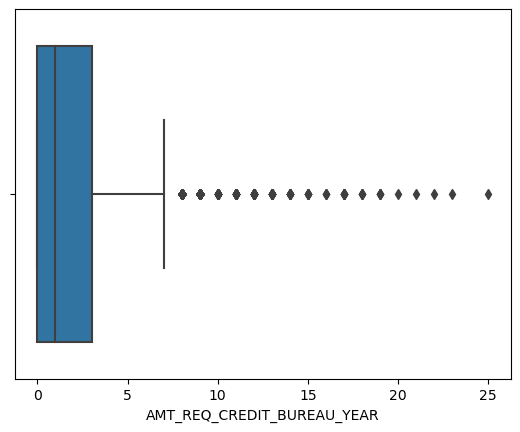

In [21]:
sns.boxplot(data=data,x='AMT_REQ_CREDIT_BUREAU_YEAR')
print(round(data.AMT_REQ_CREDIT_BUREAU_YEAR.median(),2))
data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0.51,inplace=True)

In [22]:
# Now we have removed all the null values. So let's check the dataset
data.isna().sum()  

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
REG_REGION_NOT_LIVE_REGION    0
REG_REGION_NOT_WORK_REGION    0
ORGANIZATION_TYPE             0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: i

In [23]:
# checking the length of the columns of the dataset
len(data.columns)

31

In [24]:
#ensuring whether all the columns are formatted correctly.
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27107.516071,5.383163e+05,0.020868,-16036.995067,63815.045904,-2994.202373,0.015144,0.050769,5.143832e-01,0.510684,0.074396,0.074913,0.098581,0.300151,0.298489,1.712305
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14494.443720,3.692890e+05,0.013831,4363.988632,141275.766519,1509.450419,0.122126,0.219526,1.908551e-01,0.174465,0.188944,0.200397,0.250320,0.855948,0.743220,1.802253
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.510000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-4299.000000,0.000000,0.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-3254.000000,0.000000,0.000000,5.654672e-01,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-1720.000000,0.000000,0.000000,6.634218e-01,0.636376,0.000000,0.000000,0.000000,0.510000,0.510000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,1.000000,1.000000,8.549997e-01,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307511 non-null  float64
 10  AMT_GOODS_PRICE             307511 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

### Checking the Gender and Organization Columns for any error

In [26]:
data[data['CODE_GENDER']=='NaN'].shape

(0, 31)

In [27]:
data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [28]:
#Since females are in leading in majority, let's replace XNA value with F for easier analysis
data.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace = True)

In [29]:
data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [30]:
# Checking the null values in the organization type 
data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

### Deriving the metrics
#### Creating bins for income amount


In [31]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

data['AMT_INCOME_RANGE']=pd.cut(data['AMT_INCOME_TOTAL'],bins,labels=slot)

#### Same approach - bins for Credit amount


In [32]:
# Same approach - bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

data['AMT_CREDIT_RANGE']=pd.cut(data['AMT_CREDIT'],bins=bins,labels=slots)

In [33]:
# Hence dropping the rows of total 55374 have XNA values in the organization type column
data = data.drop(data.loc[data['ORGANIZATION_TYPE']=='XNA'].index)

In [34]:
data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### Checking the Data Imbalance Ratio

In [35]:
target_counts = data['TARGET'].value_counts(normalize=True).mul(100)

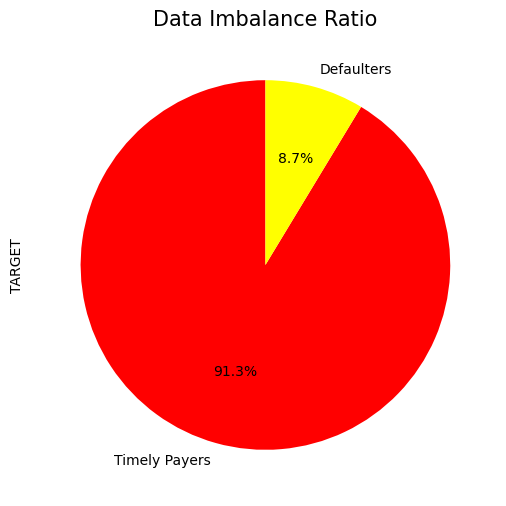

In [36]:
plt.figure(figsize=(6,6))
data['TARGET'].value_counts(normalize=True).mul(100).plot(kind='pie', colors=['red', 'yellow'], labels=['Timely Payers', 'Defaulters'], autopct='%1.1f%%', startangle=90)
plt.title('Data Imbalance Ratio', fontsize=15)
plt.show()

### Points observed from the ratio

##### The value of 0 indicates that 91.3% of customers have paid back the loan on time, while the value of 1 indicates that 8.7% of customers have defaulted on the loan.

### Dividing the dataset into two dataset which is  target=1 (client with payment difficulties) and target=0 (other clients)

In [60]:
target0_data=data.loc[data["TARGET"]==0]
target1_data=data.loc[data["TARGET"]==1]

## Univariate Analysis

#### Now that our dataset is clean and good to do, let's do the data analysis.

#### Performing various analysis for categorical variables

#### NAME_INCOME_TYPE

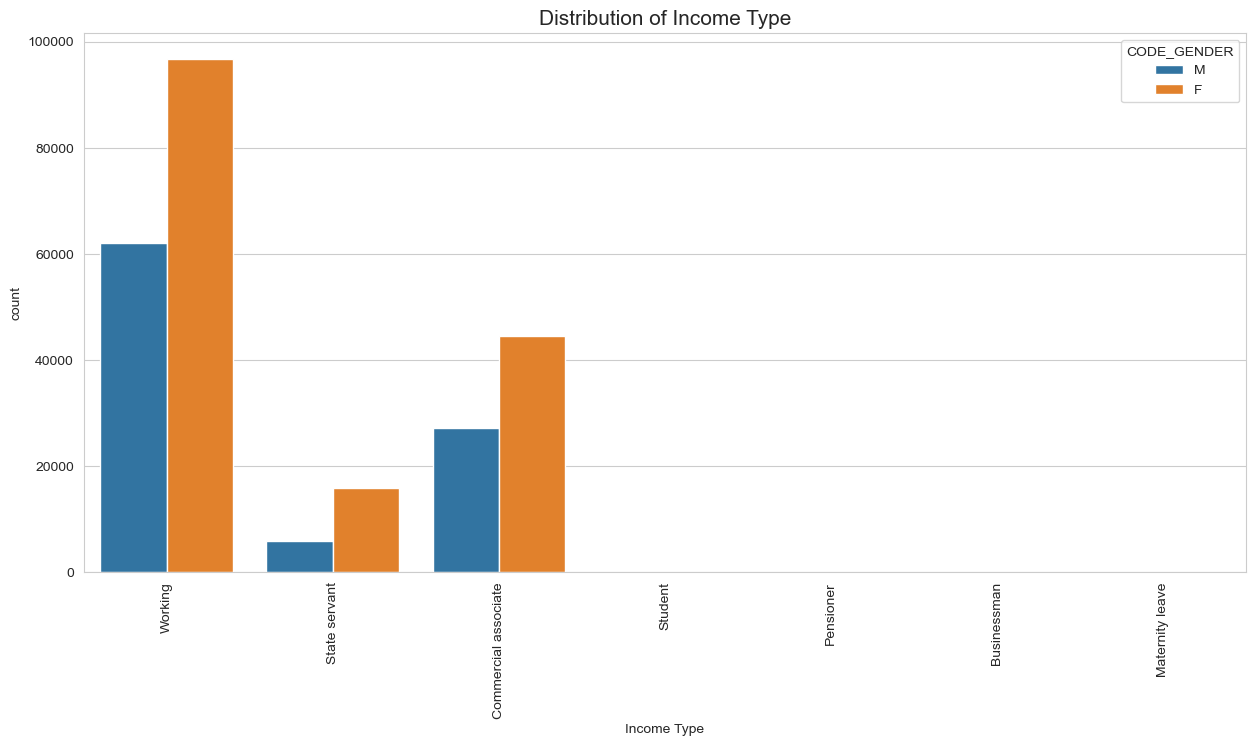

In [38]:
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=data,x='NAME_INCOME_TYPE', hue='CODE_GENDER')
plt.title("Distribution of Income Type", fontsize=15)
plt.xlabel('Income Type')
plt.xticks(rotation=90)
plt.show()

### Conclusion from the above graph.
###### 1. For income type, the 'working',  'commercial associate', and 'state servant' are the safest segments and have high number of credits.
###### 2. Female gender has more credits than male
###### 3. Zero number of credits for 'student', 'pensioner', 'businessman', and 'maternity leave'

#### NAME_FAMILY_STATUS

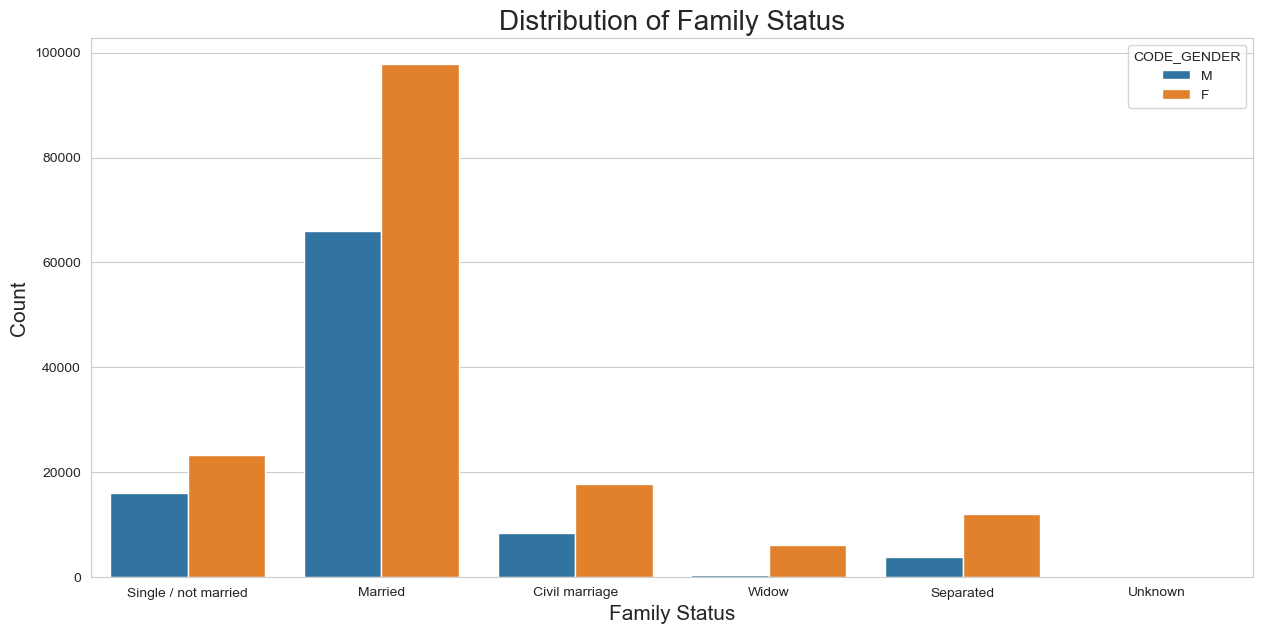

In [39]:
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=data, x='NAME_FAMILY_STATUS', hue='CODE_GENDER')
plt.title("Distribution of Family Status", fontsize=20)
plt.xlabel('Family Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Conclusion from the above graph.

#### 1. Female has the most number of credits and applies for every metric
#### 2. For family status, married clients have the highest number of credits
#### 3. Single/not married, civil marriage, widow, seperated share less credits

#### NAME_CONTRACT_TYPE

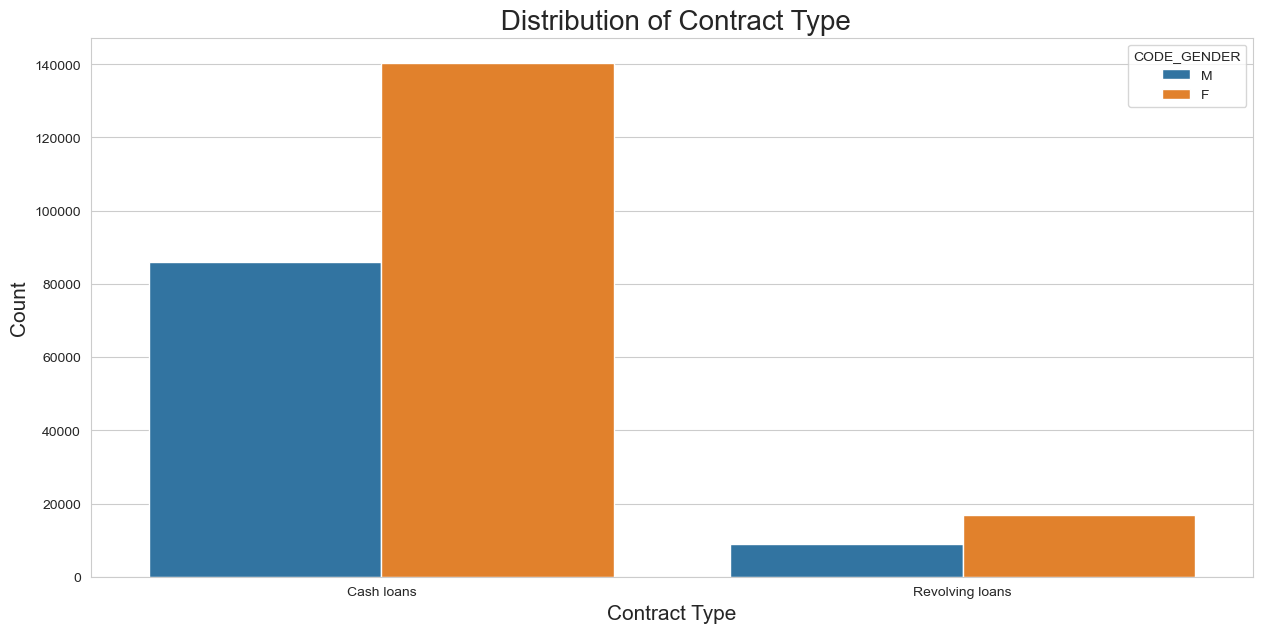

In [40]:
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=data,x='NAME_CONTRACT_TYPE', hue='CODE_GENDER')
plt.title(" Distribution of Contract Type", fontsize=20)
plt.xlabel('Contract Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Conclusion from the above graph.

#### For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
#### Female is leading for applying credits

#### NAME_EDUCATION_TYPE

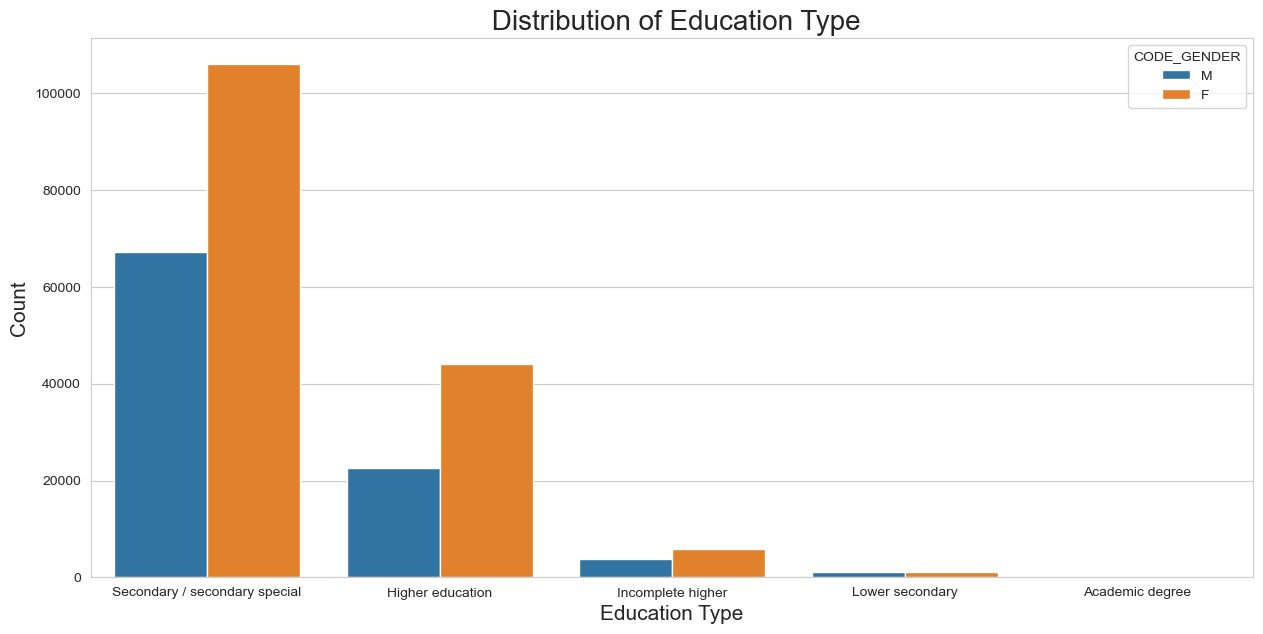

In [41]:
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=data,x='NAME_EDUCATION_TYPE', hue='CODE_GENDER')
plt.title(" Distribution of Education Type", fontsize=20)
plt.xlabel('Education Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Conclusion from the above graph.

#### 1. For this clients from secondary/secondary share the highest credits
#### 2. Clients from higher education has more counts than incomplete higher education

#### ORGANIZATION_TYPE

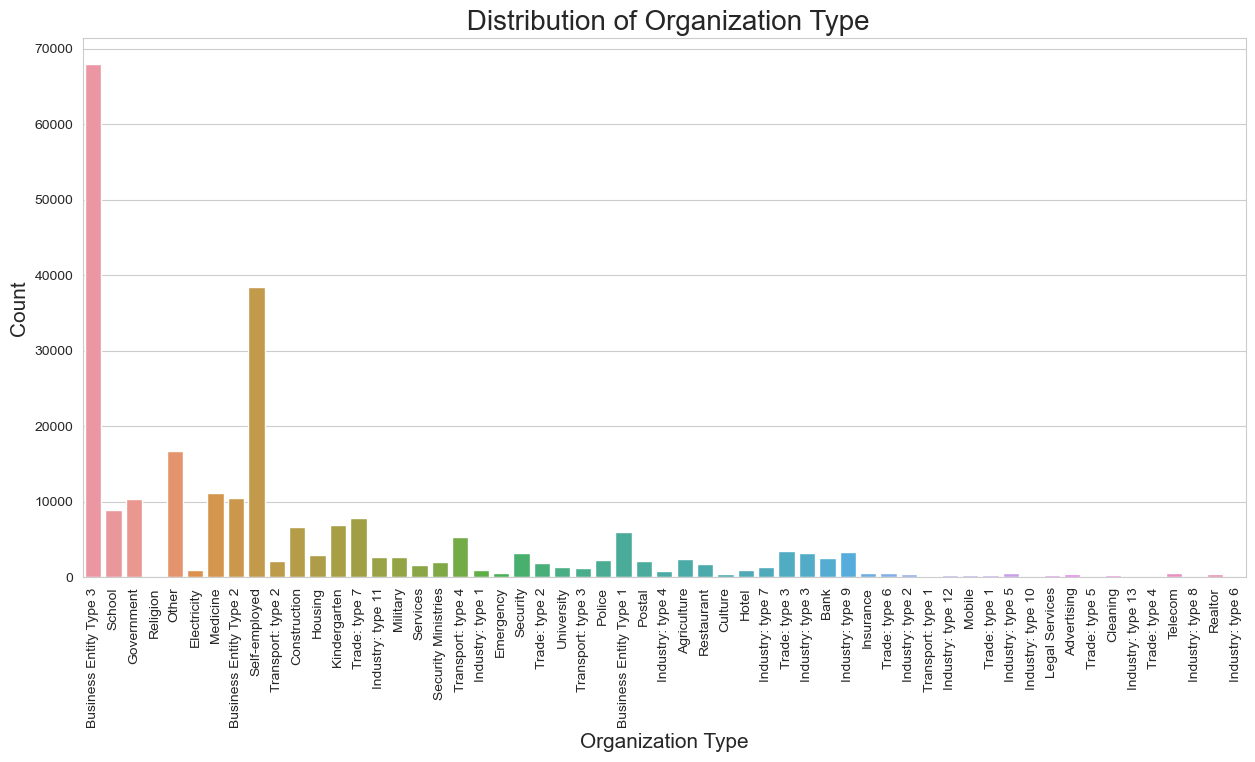

In [42]:
plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=data,x='ORGANIZATION_TYPE')
plt.title(" Distribution of Organization Type", fontsize=20)
plt.xlabel('Organization Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Points to be concluded from the above graph.

#### 1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
#### 2. Less clients are from Industry type 6, type 10, realtor, religion and trade type 5, type 4.

### NAME_INCOME_TYPE

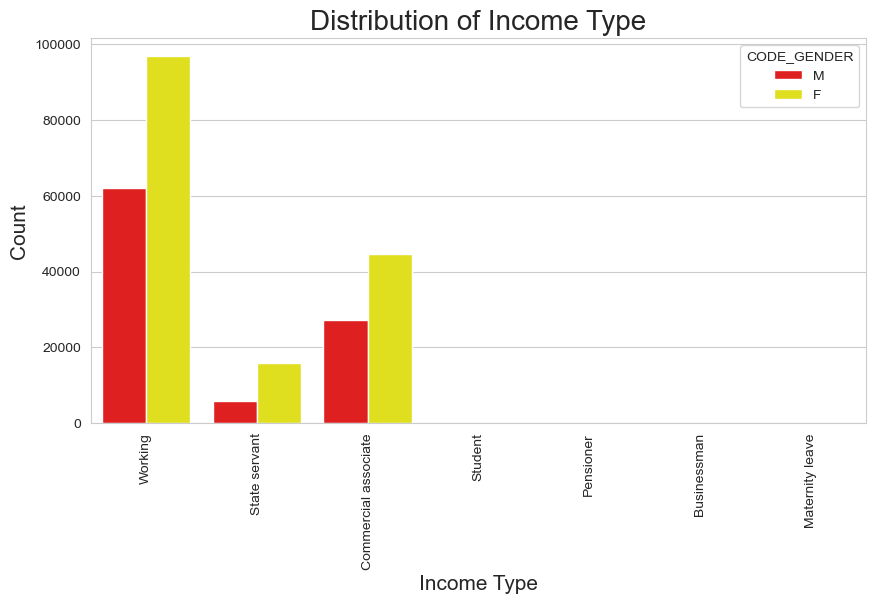

In [43]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')

# plot the countplot
sns.countplot(data=data,x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette=['red', 'yellow'])

# add labels and title
plt.title("Distribution of Income Type", fontsize=20)
plt.xlabel('Income Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Points to be concluded from the above graph.

#### 1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
#### 2. Females are having more number of credits than male.
#### 3. No credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

### AMT_INCOME_TOTAL

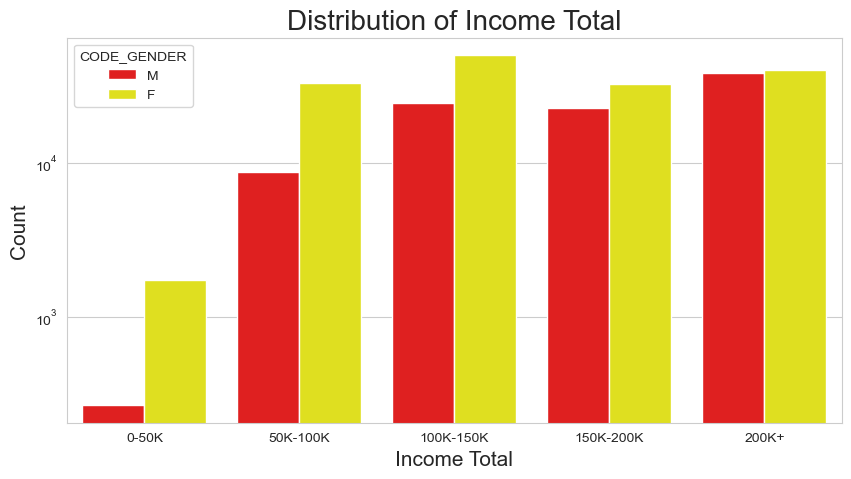

In [44]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')

# create income range categories
data['income_range'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=[0, 50000, 100000, 150000, 200000, 10000000], 
                       labels=['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K+'])

# plot the countplot
sns.countplot(data=data, x='income_range', hue='CODE_GENDER', palette=['red', 'yellow'])

# add labels and title
plt.title("Distribution of Income Total", fontsize=20)
plt.xlabel('Income Total', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yscale('log')
plt.show()

### Points to be concluded from the graph
#### Females have the highest income - 100k to 150k
#### Females also top the income in 150 to 200k

### OCCUPATION_TYPE 

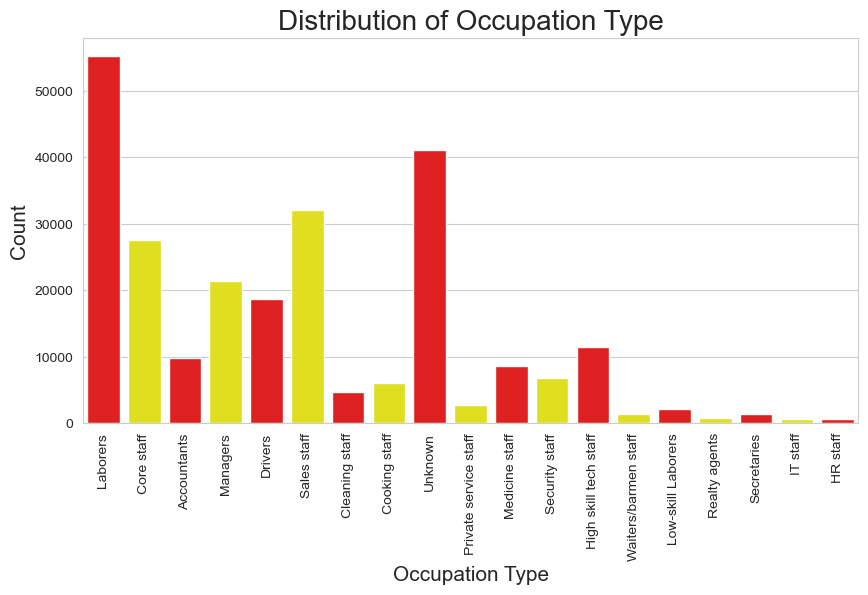

In [45]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')

# plot the countplot
sns.countplot(data=data,x='OCCUPATION_TYPE', palette=['red', 'yellow'])

# add labels and title
plt.title("Distribution of Occupation Type", fontsize=20)
plt.xlabel('Occupation Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
# display the plot
plt.show()

#### NAME_HOUSING_TYPE

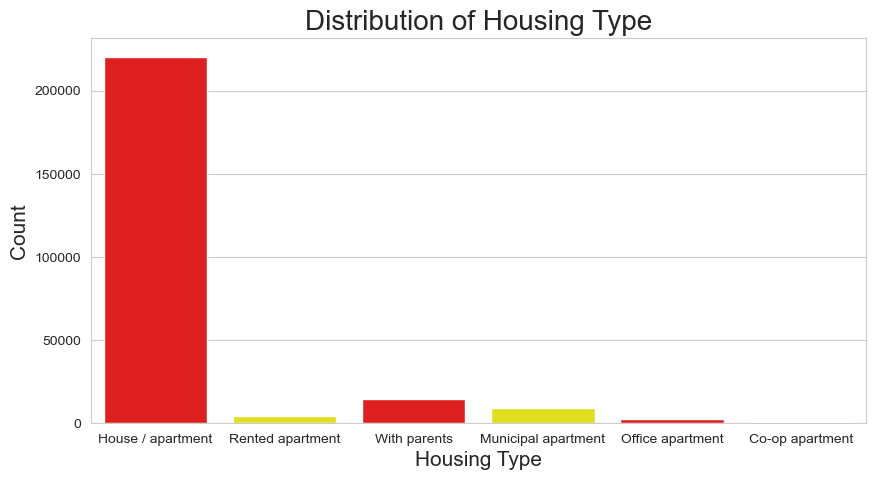

In [46]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')

# plot the countplot
sns.countplot(data=data,x='NAME_HOUSING_TYPE', palette=['red', 'yellow'])

# add labels and title
plt.title("Distribution of Housing Type", fontsize=20)
plt.xlabel('Housing Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Graph Observation

#### People in house/apartment are vulnerable to payment defaults
#### "With parents" has the second highest number of payment defaults


### Bivariate Analysis for Numeric Variables

#### Target 0
#### Income Amount vs Education Status

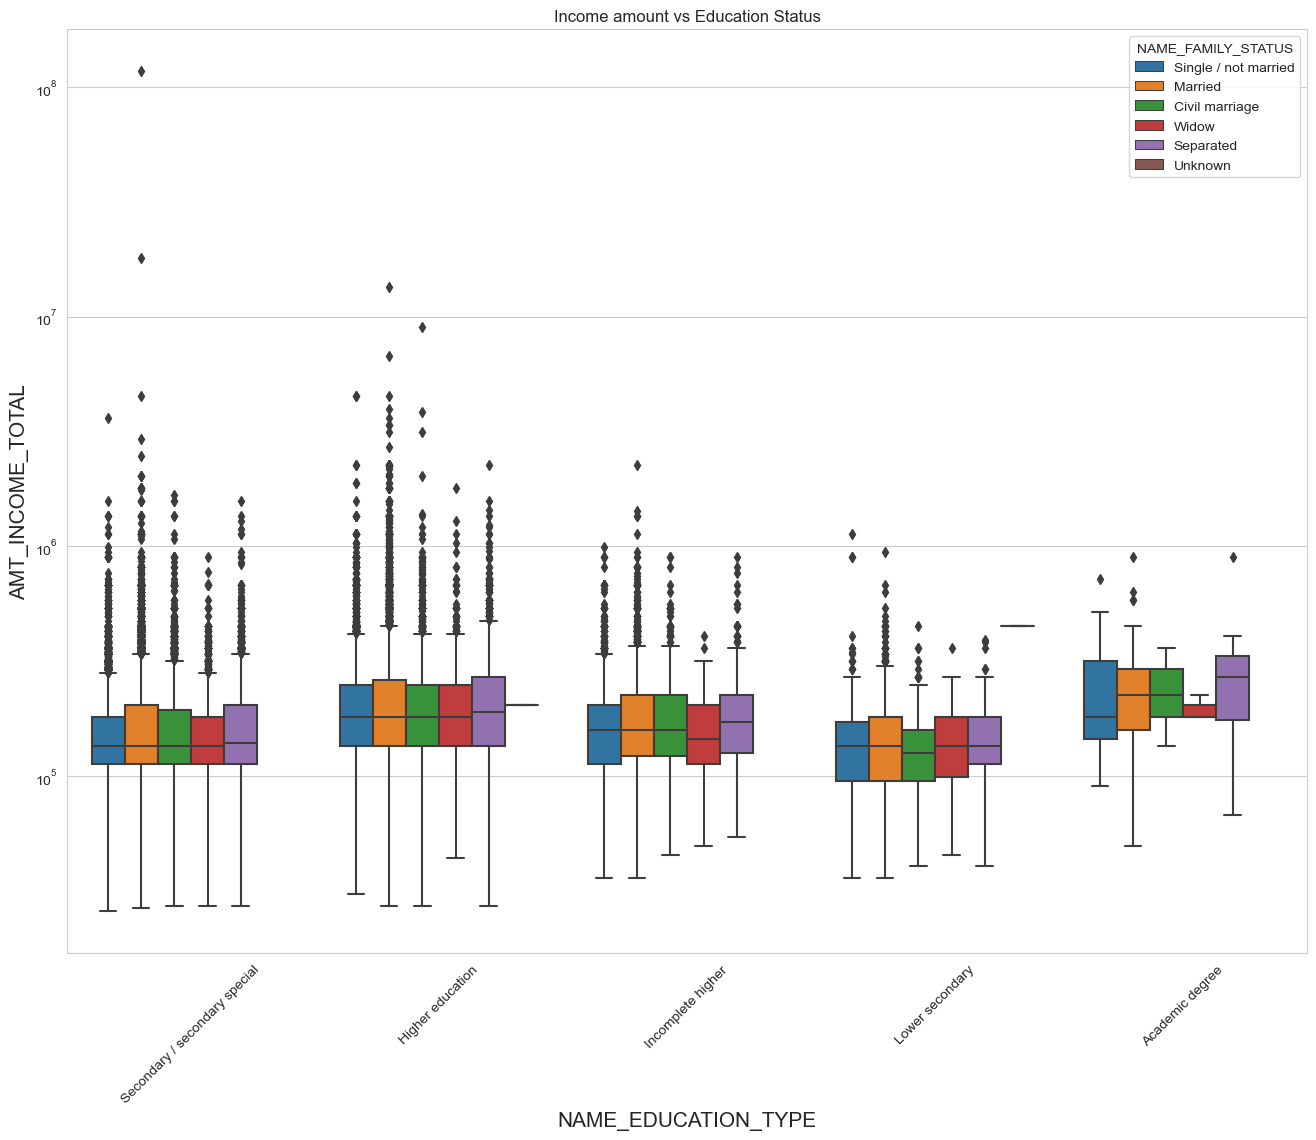

In [47]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.xlabel('NAME_EDUCATION_TYPE', fontsize=15)
plt.ylabel('AMT_INCOME_TOTAL', fontsize=15)
plt.show()

### Graph Observation

#### Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

### Credit Amount vs Education Status

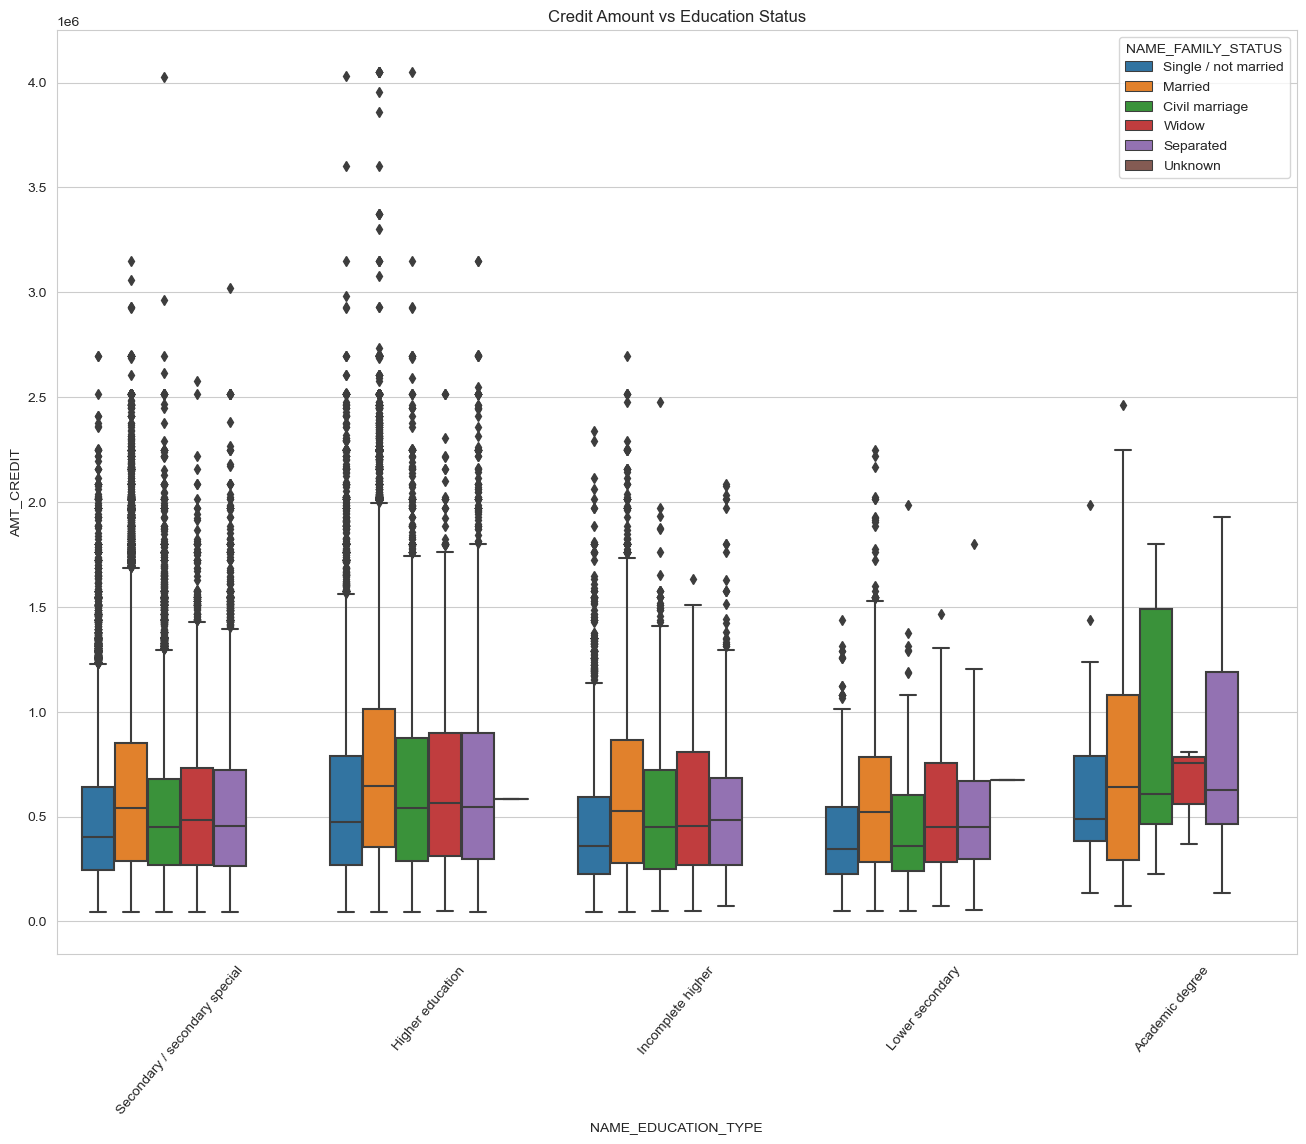

In [48]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=50)
sns.boxplot(data =data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

### Graph Observation
#### Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

### Amount Income vs Amount Credit

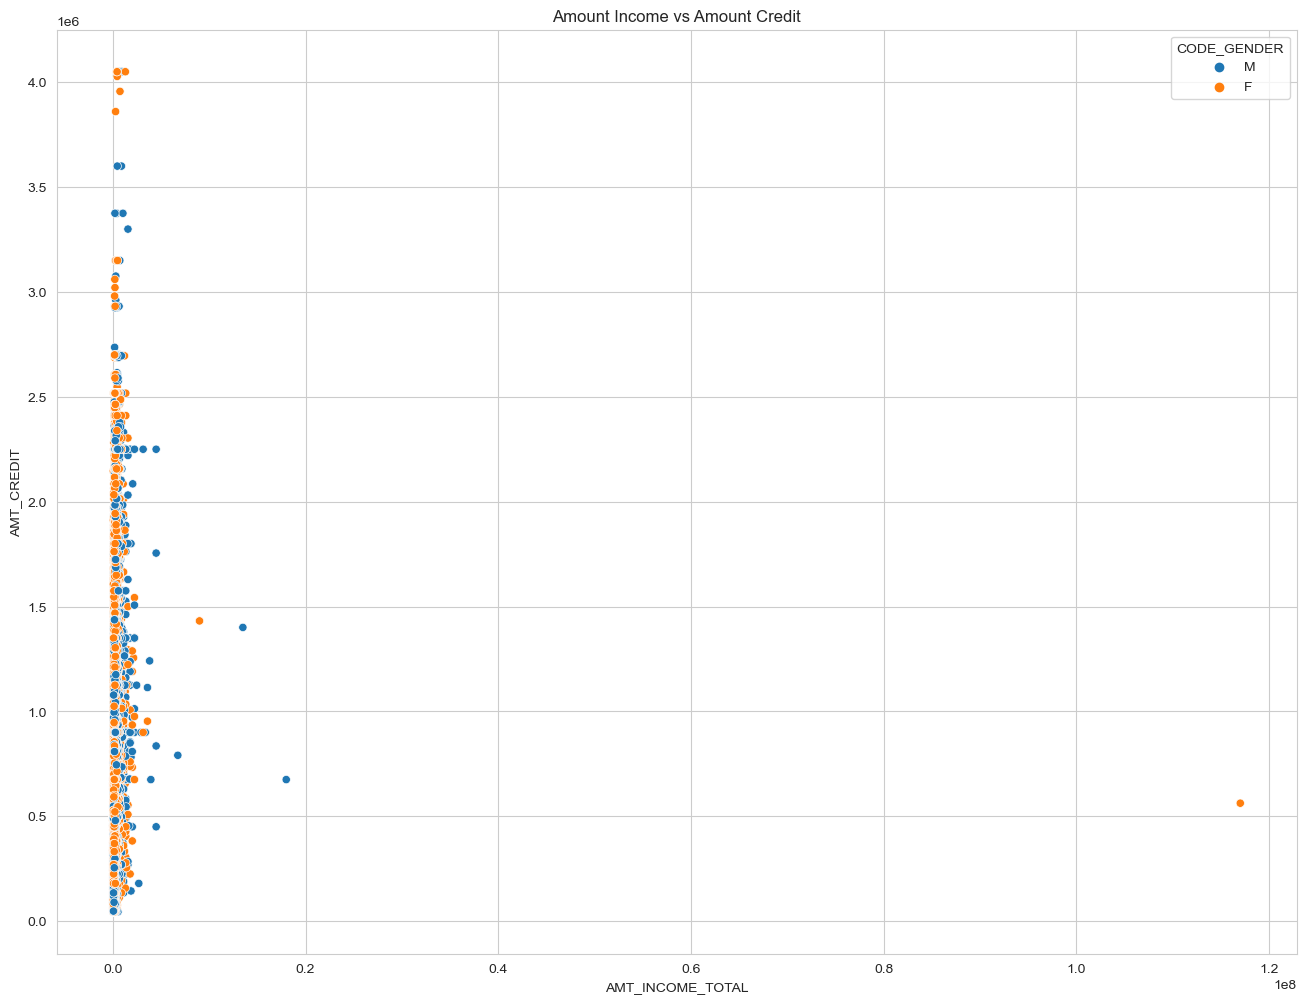

In [49]:
plt.figure(figsize=(16,12))
sns.scatterplot(data =data, x='AMT_INCOME_TOTAL',y='AMT_CREDIT', hue ='CODE_GENDER')
plt.title('Amount Income vs Amount Credit')
plt.show()

### Graph Observation 

#### People with low income still taking higer credit amount

#### Females have higher credit amount than male

### Amount Annuity vs Amount Credit

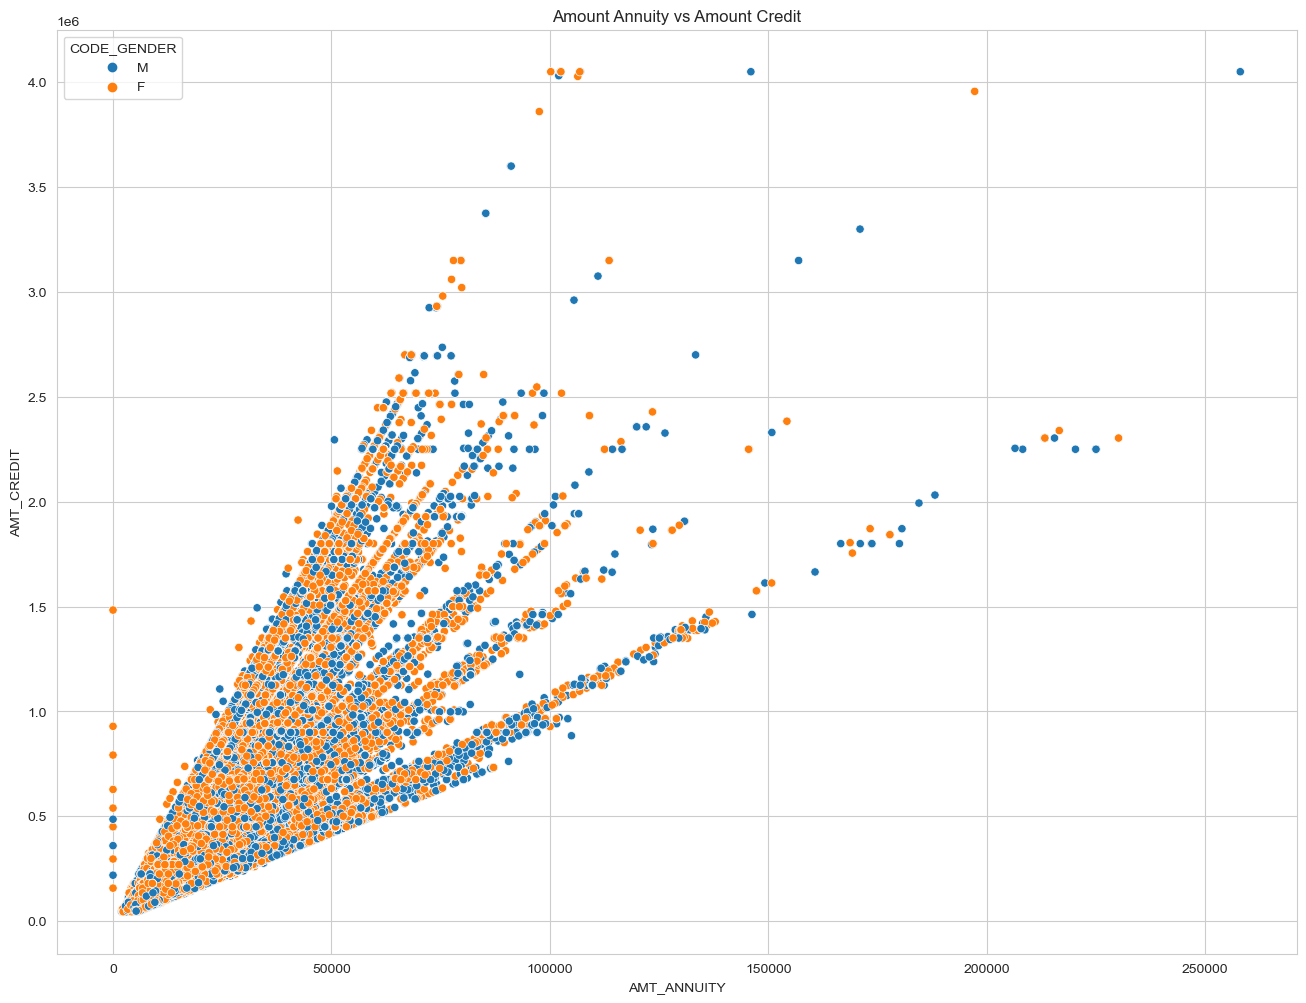

In [50]:
plt.figure(figsize=(16,12))
sns.scatterplot(data =data, x='AMT_ANNUITY',y='AMT_CREDIT', hue ='CODE_GENDER')
plt.title('Amount Annuity vs Amount Credit')
plt.show()

### Graph observation

#### Male have Higher annuity credits (4.0 and 250000) than female

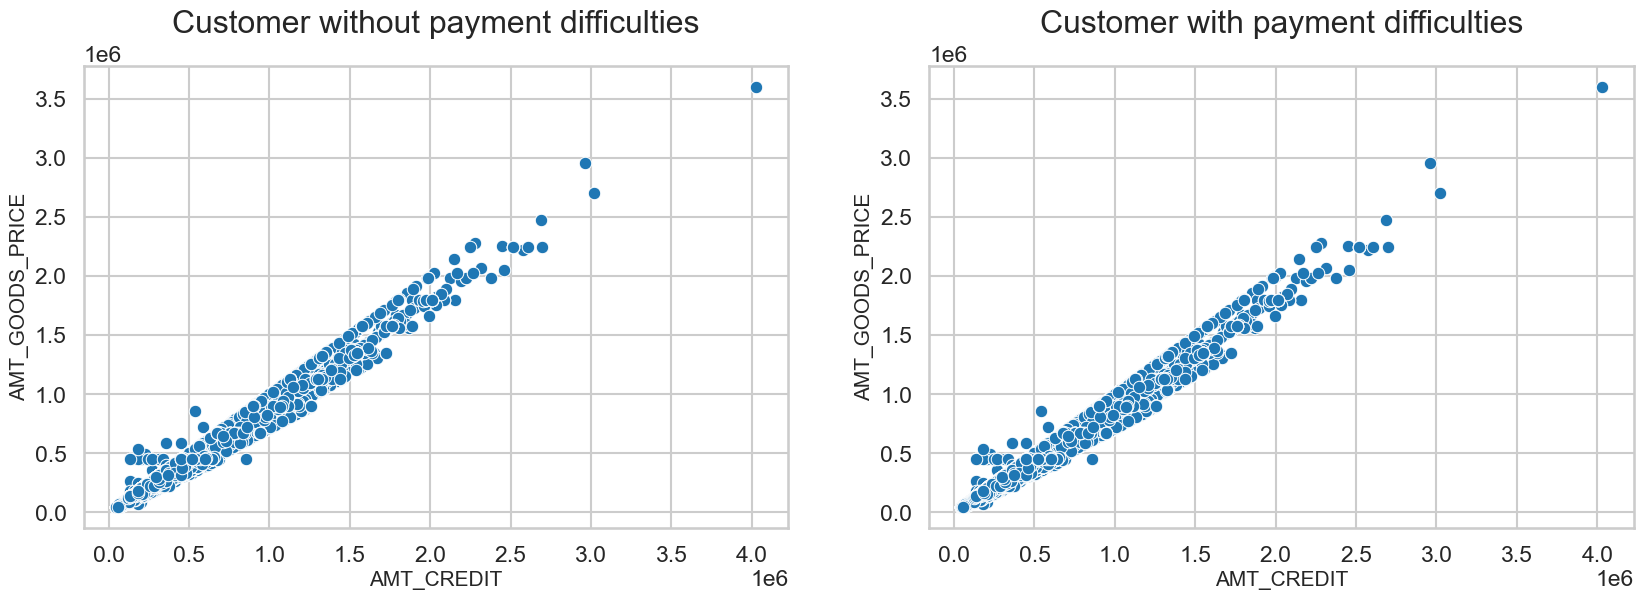

In [123]:
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=target1_data,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')


plt.subplot(1,2,2)
ax = sns.scatterplot(data=target1_data,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')

plt.show()

###  Income Type vs Education Type

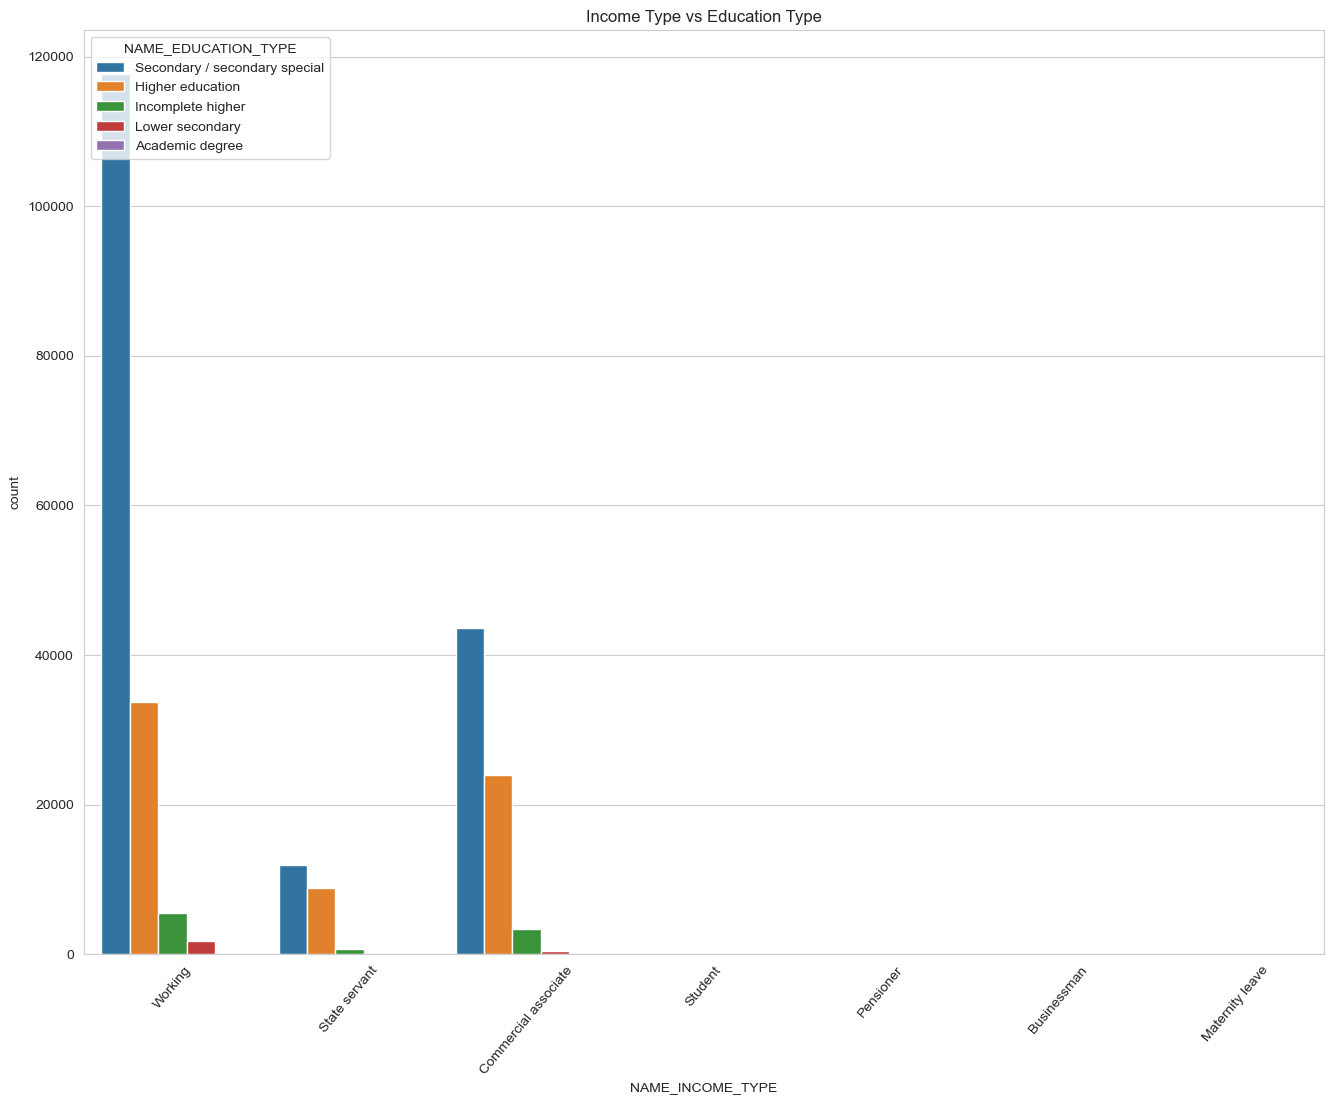

In [51]:
plt.figure(figsize=(16,12))
sns.countplot(data =data, x='NAME_INCOME_TYPE', hue='NAME_EDUCATION_TYPE')
plt.title('Income Type vs Education Type')
plt.xticks(rotation=50)
plt.show()

### Graph Observation

#### 1. Secondary/secondary special in every segment has the highest credit compared to other frequencies
#### The working class with secondary/secondary special has the highest credit compared to others
#### 2. The commercial associate is the second highest followed by state servant with the least values

### Credit Amount vs Education Status

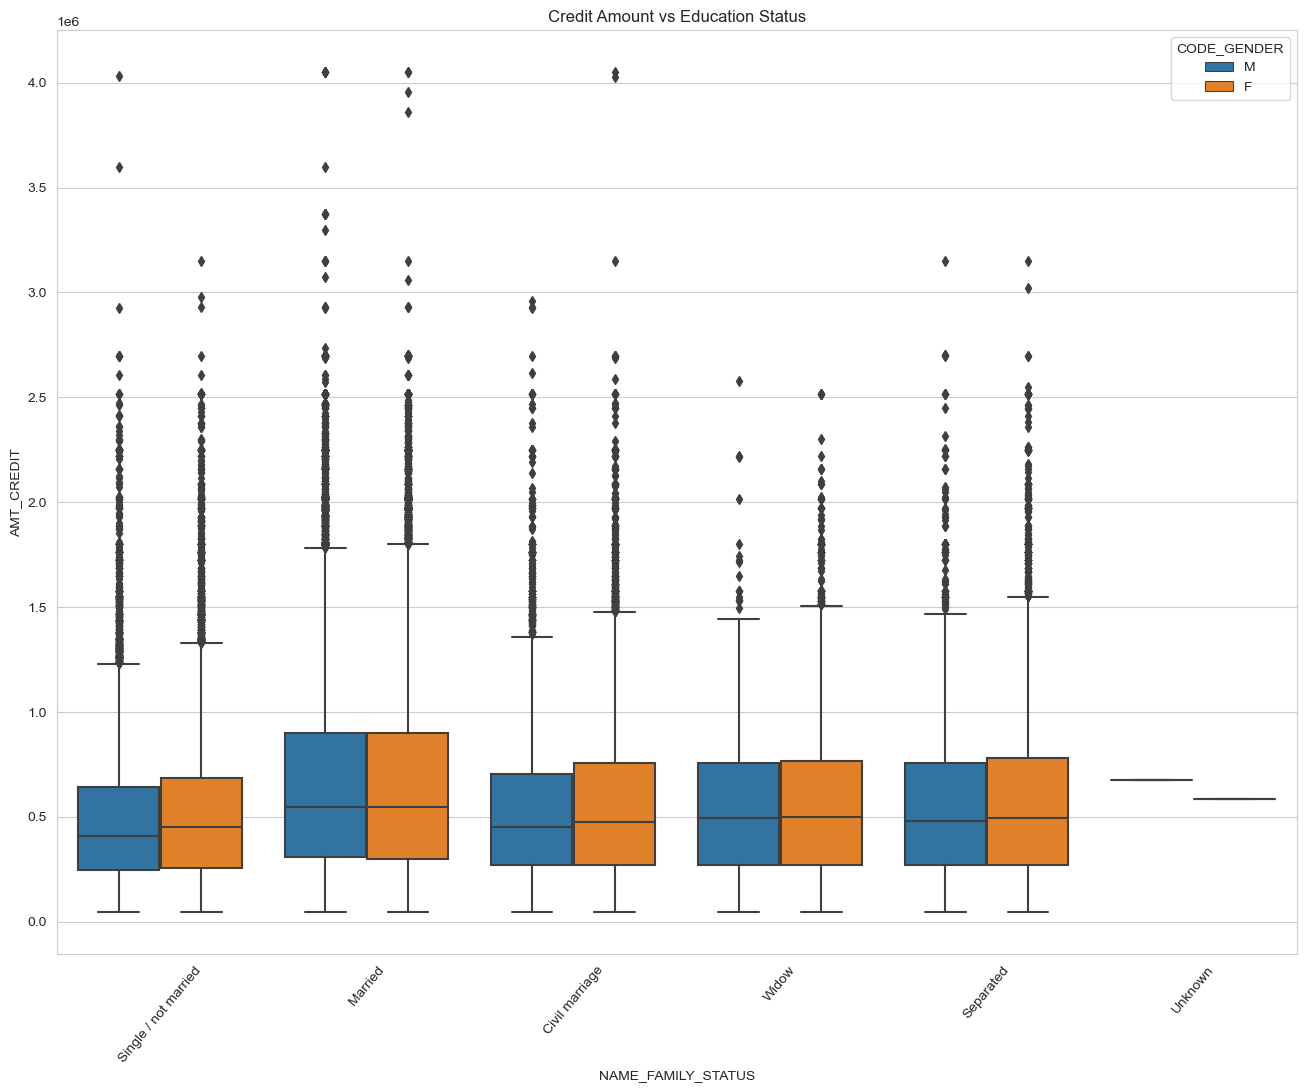

In [52]:
 # Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=50)
sns.boxplot(data =data, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='CODE_GENDER',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

### Plot observation

#### Single/not married, married, and widow have higher credits than other famil status.
#### It is observed that female are in majority than male in credits, except in single/not married

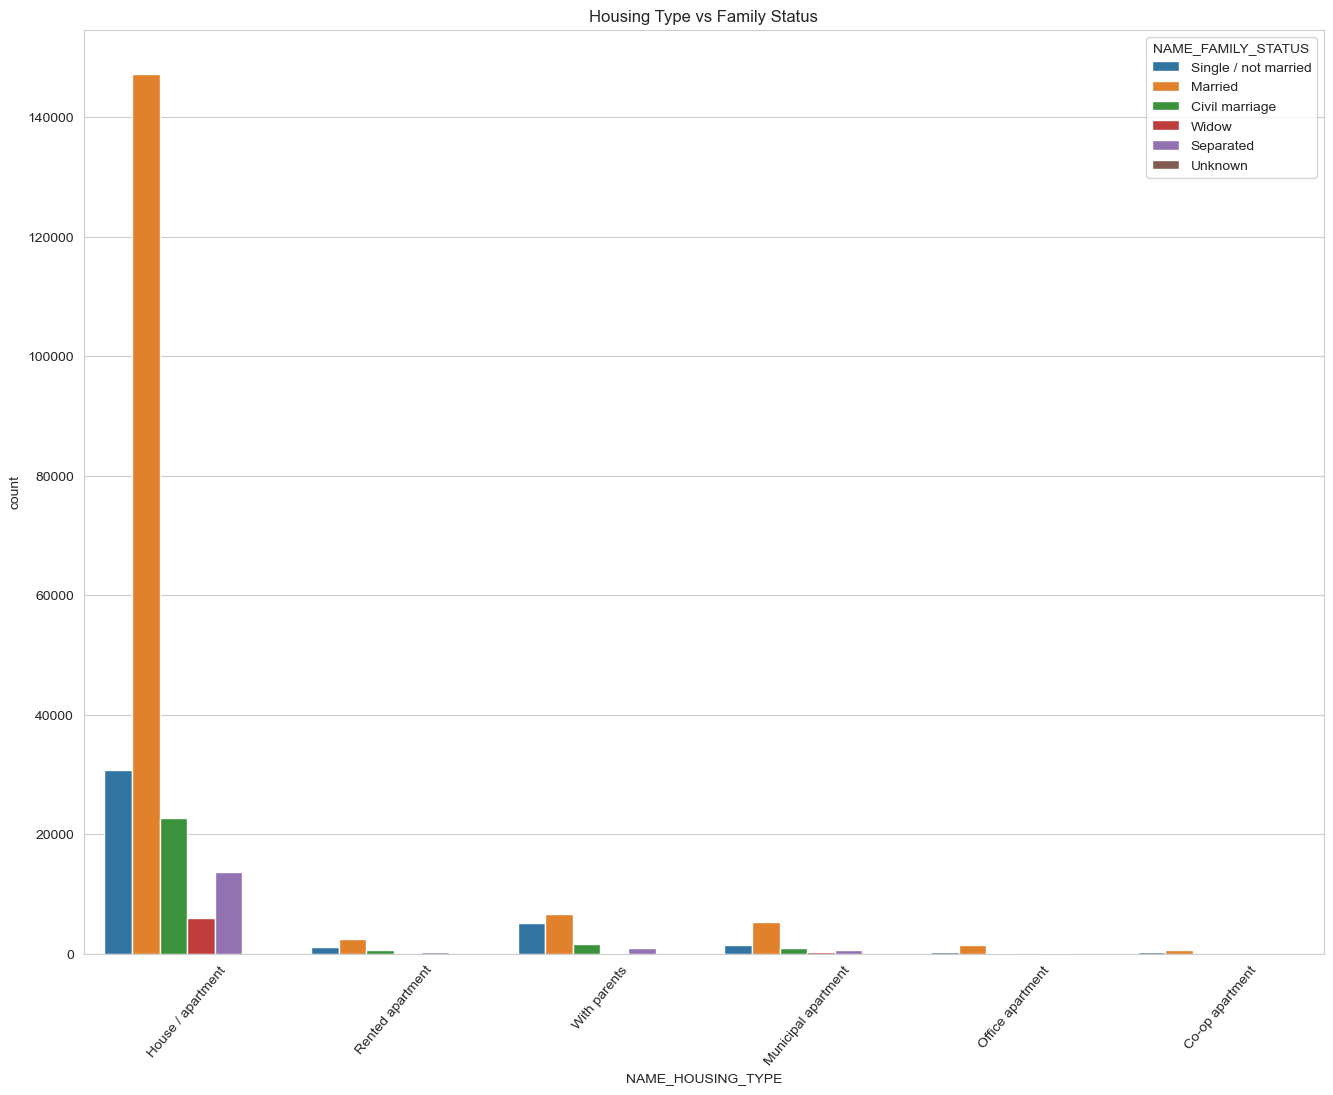

In [53]:
plt.figure(figsize=(16,12))
sns.countplot(data =data, x='NAME_HOUSING_TYPE', hue='NAME_FAMILY_STATUS')
plt.title('Housing Type vs Family Status')
plt.xticks(rotation=50)
plt.show()

In [78]:
corr_target0  

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000484,0.001415,-0.000777,-0.001148,-0.000387,-0.000094,-0.001016,-0.000005,0.000202,-0.000699,0.001145,0.001331,0.000911,0.000358,0.000242,0.001414,0.000647,0.000469,0.003186
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000484,NaN,1.000000,-0.009826,-0.018704,-0.007554,-0.022293,-0.030352,0.242462,0.063036,-0.117746,-0.023033,-0.016798,-0.026118,-0.013616,-0.020929,-0.018925,-0.015432,-0.021772,-0.005336,-0.023585
AMT_INCOME_TOTAL,0.001415,NaN,-0.009826,1.000000,0.326155,0.400708,0.333292,0.169306,-0.045543,-0.030102,-0.026462,0.064868,0.129765,0.137705,-0.043692,-0.047639,-0.041104,-0.029869,0.044552,0.004624,0.034386
AMT_CREDIT,-0.000777,NaN,-0.018704,0.326155,1.000000,0.762045,0.986471,0.103876,-0.152659,-0.087500,-0.034914,0.020979,0.050597,0.135991,0.051490,-0.048330,-0.041106,-0.035398,0.044493,0.011737,-0.033775
AMT_ANNUITY,-0.001148,NaN,-0.007554,0.400708,0.762045,1.000000,0.766596,0.122113,-0.091571,-0.052472,-0.025992,0.039705,0.075939,0.126902,0.041571,-0.011306,-0.010519,0.000778,0.030409,0.011136,-0.003035
AMT_GOODS_PRICE,-0.000387,NaN,-0.022293,0.333292,0.986471,0.766596,1.000000,0.107024,-0.146854,-0.088614,-0.036687,0.023545,0.052040,0.142408,0.053575,-0.047705,-0.040502,-0.034663,0.046222,0.012238,-0.036468
REGION_POPULATION_RELATIVE,-0.000094,NaN,-0.030352,0.169306,0.103876,0.122113,0.107024,1.000000,-0.041138,0.008663,-0.004014,-0.003262,0.065822,0.206879,-0.011963,0.004539,0.005870,0.001005,0.076033,-0.001151,-0.003207
DAYS_BIRTH,-0.001016,NaN,0.242462,-0.045543,-0.152659,-0.091571,-0.146854,-0.041138,1.000000,0.352662,0.108050,0.058344,0.039298,-0.142105,-0.154494,0.059706,0.056801,0.042385,-0.021449,0.005441,-0.064762
DAYS_EMPLOYED,-0.000005,NaN,0.063036,-0.030102,-0.087500,-0.052472,-0.088614,0.008663,0.352662,1.000000,0.086679,0.056714,0.082435,-0.081496,-0.111610,0.062018,0.060026,0.046747,-0.016321,0.012999,-0.018398


#### Heatmap for Target=0

In [82]:
corr_target0 = target0_data.corr().loc[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']] 

<AxesSubplot:>

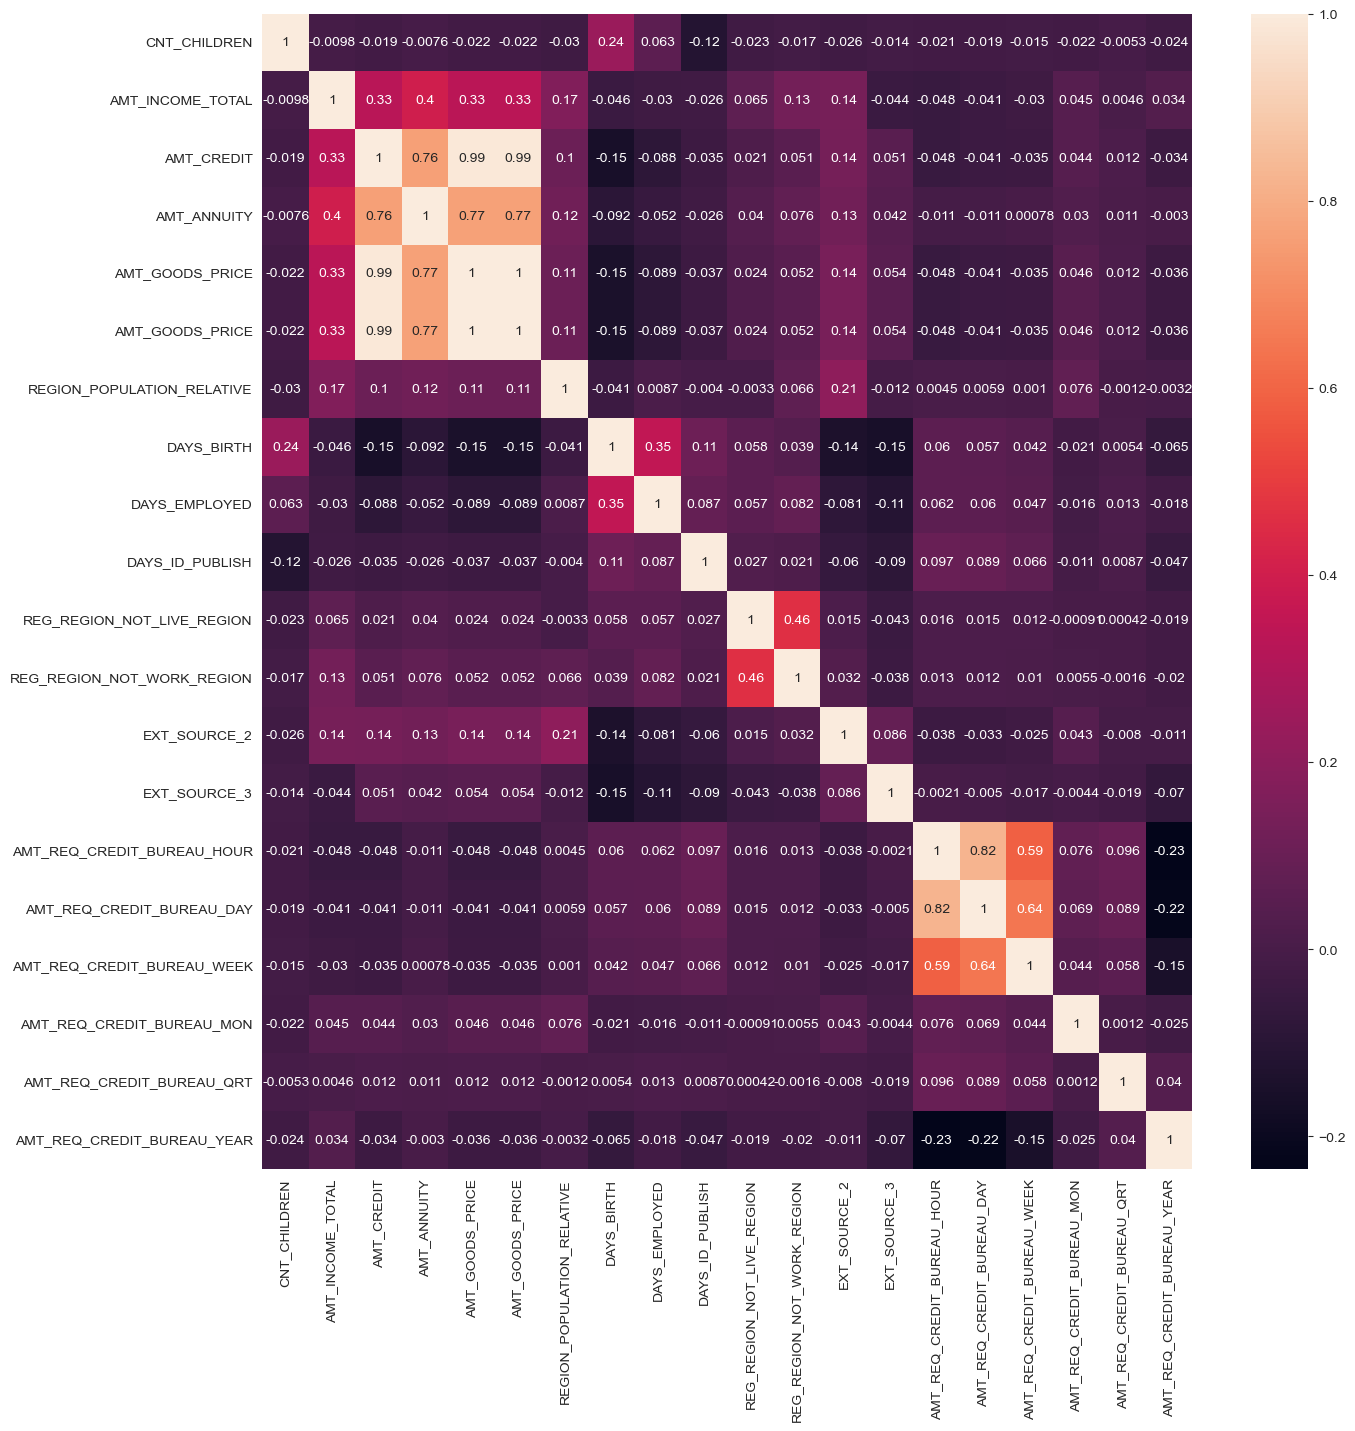

In [90]:
plt.figure(figsize=[15,15])
sns.heatmap(corr_target0, annot = True)

#### Heatmap for Target=1

In [91]:
corr_target1 = target1_data.corr().loc[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']] 

<AxesSubplot:>

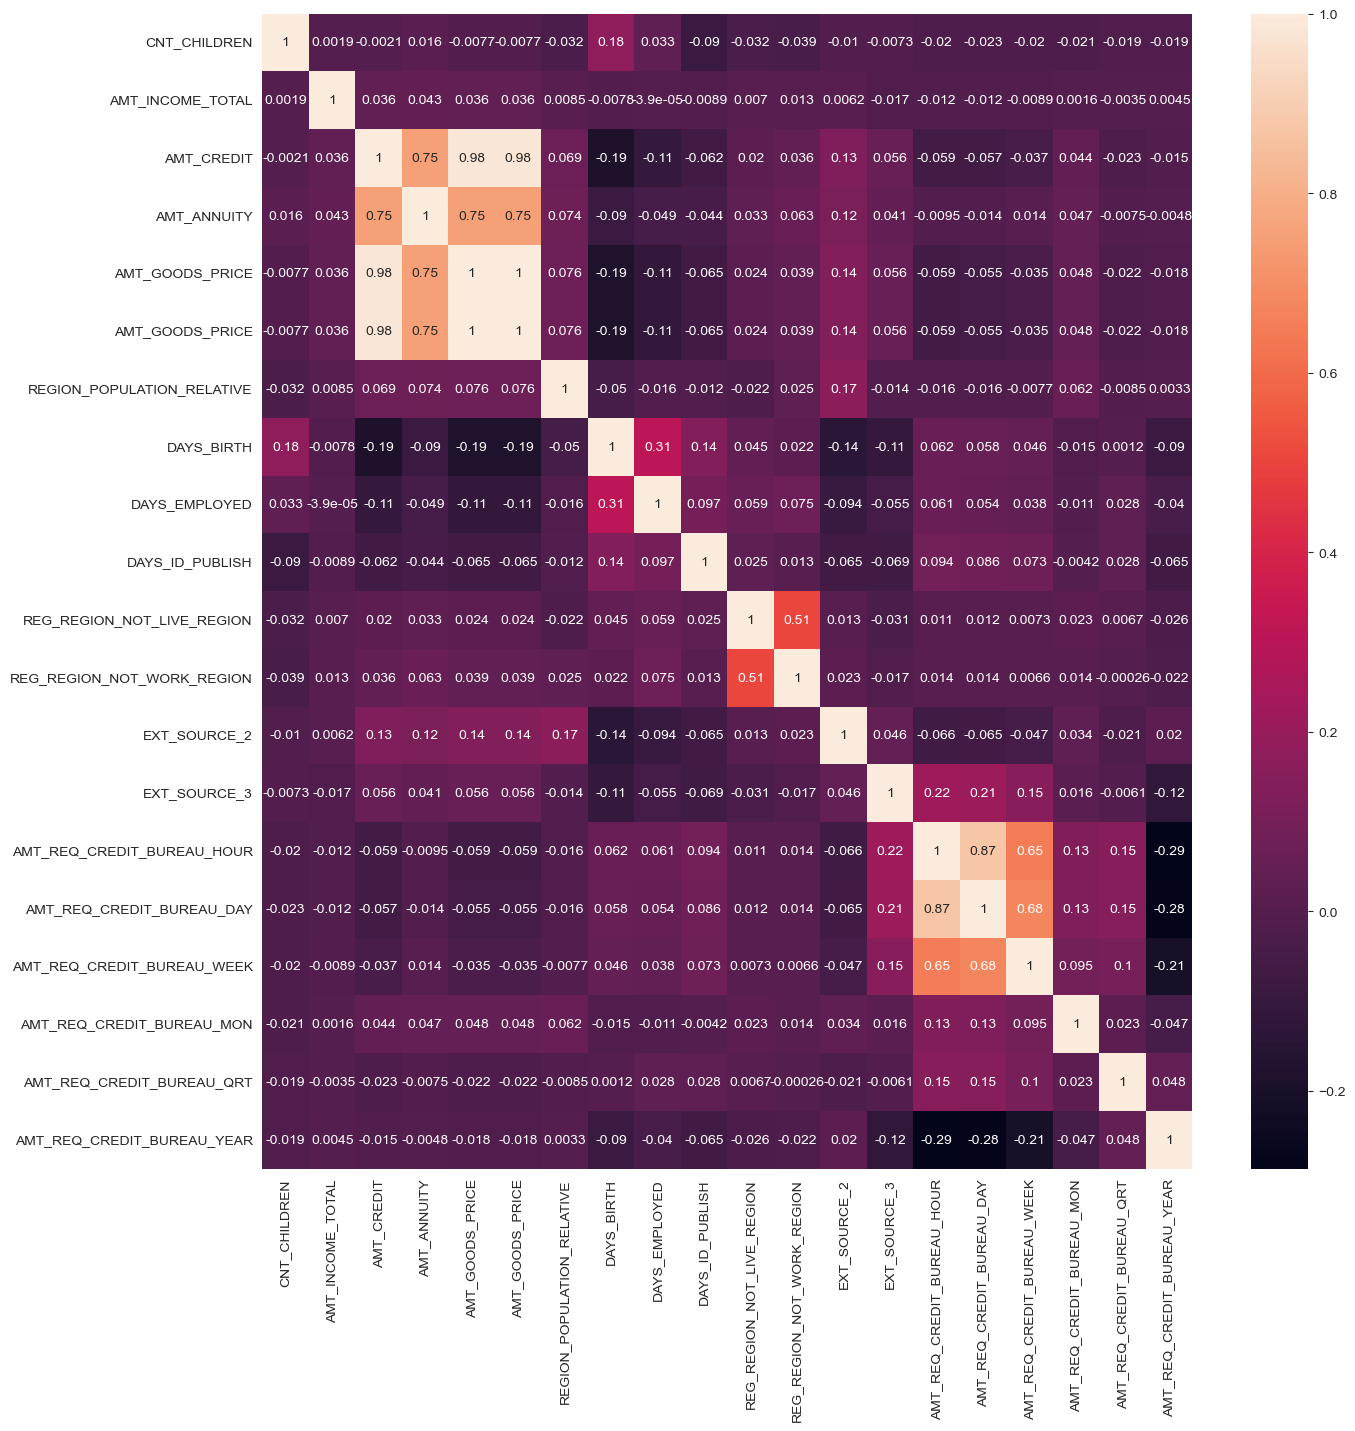

In [92]:
plt.figure(figsize=[15,15])
sns.heatmap(corr_target1, annot = True)

## Read on Previous Data Application

#### Import the dataset
#### Cleaning the missing (null) values

#### Removing unwanted columns

In [93]:
prev_data = pd.read_csv('previous_application.csv', header=0)
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# Checking for the null values in the dataset

emptycol1=prev_data.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [95]:
# checking the NAME_CASH_LOAN_PURPOSE column for unique data
prev_data.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [96]:
# Let's remove the XNA and XAP values from the column
prev_data = prev_data.drop(prev_data[prev_data.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
prev_data = prev_data.drop(prev_data[prev_data.NAME_CASH_LOAN_PURPOSE=='XAP'].index)
prev_data.shape

(69635, 37)

In [97]:
# Rechecking the NAME_CASH_LOAN_PURPOSE column for values
prev_data.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

### Merging the Application Dataset and Previous Application Datset

In [98]:
merg_loan = pd.merge(left = data, right = prev_data, how = 'inner', on = 'SK_ID_CURR', suffixes = '_x')
merg_loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,income_range,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-3015,Laborers,0,0,Business Entity Type 3,0.502779,0.510000,0.51,0.51,0.51,0.51,0.51,0.51,"75000,100000",150000-200000,50K-100K,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-3787,Unknown,0,0,Business Entity Type 3,0.479987,0.410103,0.00,0.00,0.00,1.00,0.00,5.00,275000-300000,650000-700000,200K+,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557,Drivers,0,0,Self-employed,0.321745,0.411849,0.00,0.00,0.00,0.00,1.00,1.00,350000-375000,700000-750000,200K+,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-4292,Managers,0,0,Business Entity Type 3,0.738053,0.605836,0.00,0.00,0.00,1.00,0.00,1.00,175000-200000,500000-550000,150K-200K,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-4292,Managers,0,0,Business Entity Type 3,0.738053,0.605836,0.00,0.00,0.00,1.00,0.00,1.00,175000-200000,500000-550000,150K-200K,1529558,Cash loans,29053.215,450000.0,555723.0,NaN,450000.0,MONDAY,15,Y,1,NaN,NaN,NaN,Repairs,Refused,-449,Cash through the bank,LIMIT,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash S

#### Renaming the columns in the merg_loan dataset

In [99]:
merg_loan = merg_loan.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [101]:
#drop unwanted columns

prev_data.drop(['SK_ID_CURR','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### Univariate Analysis

##### Distribution of Contract Status

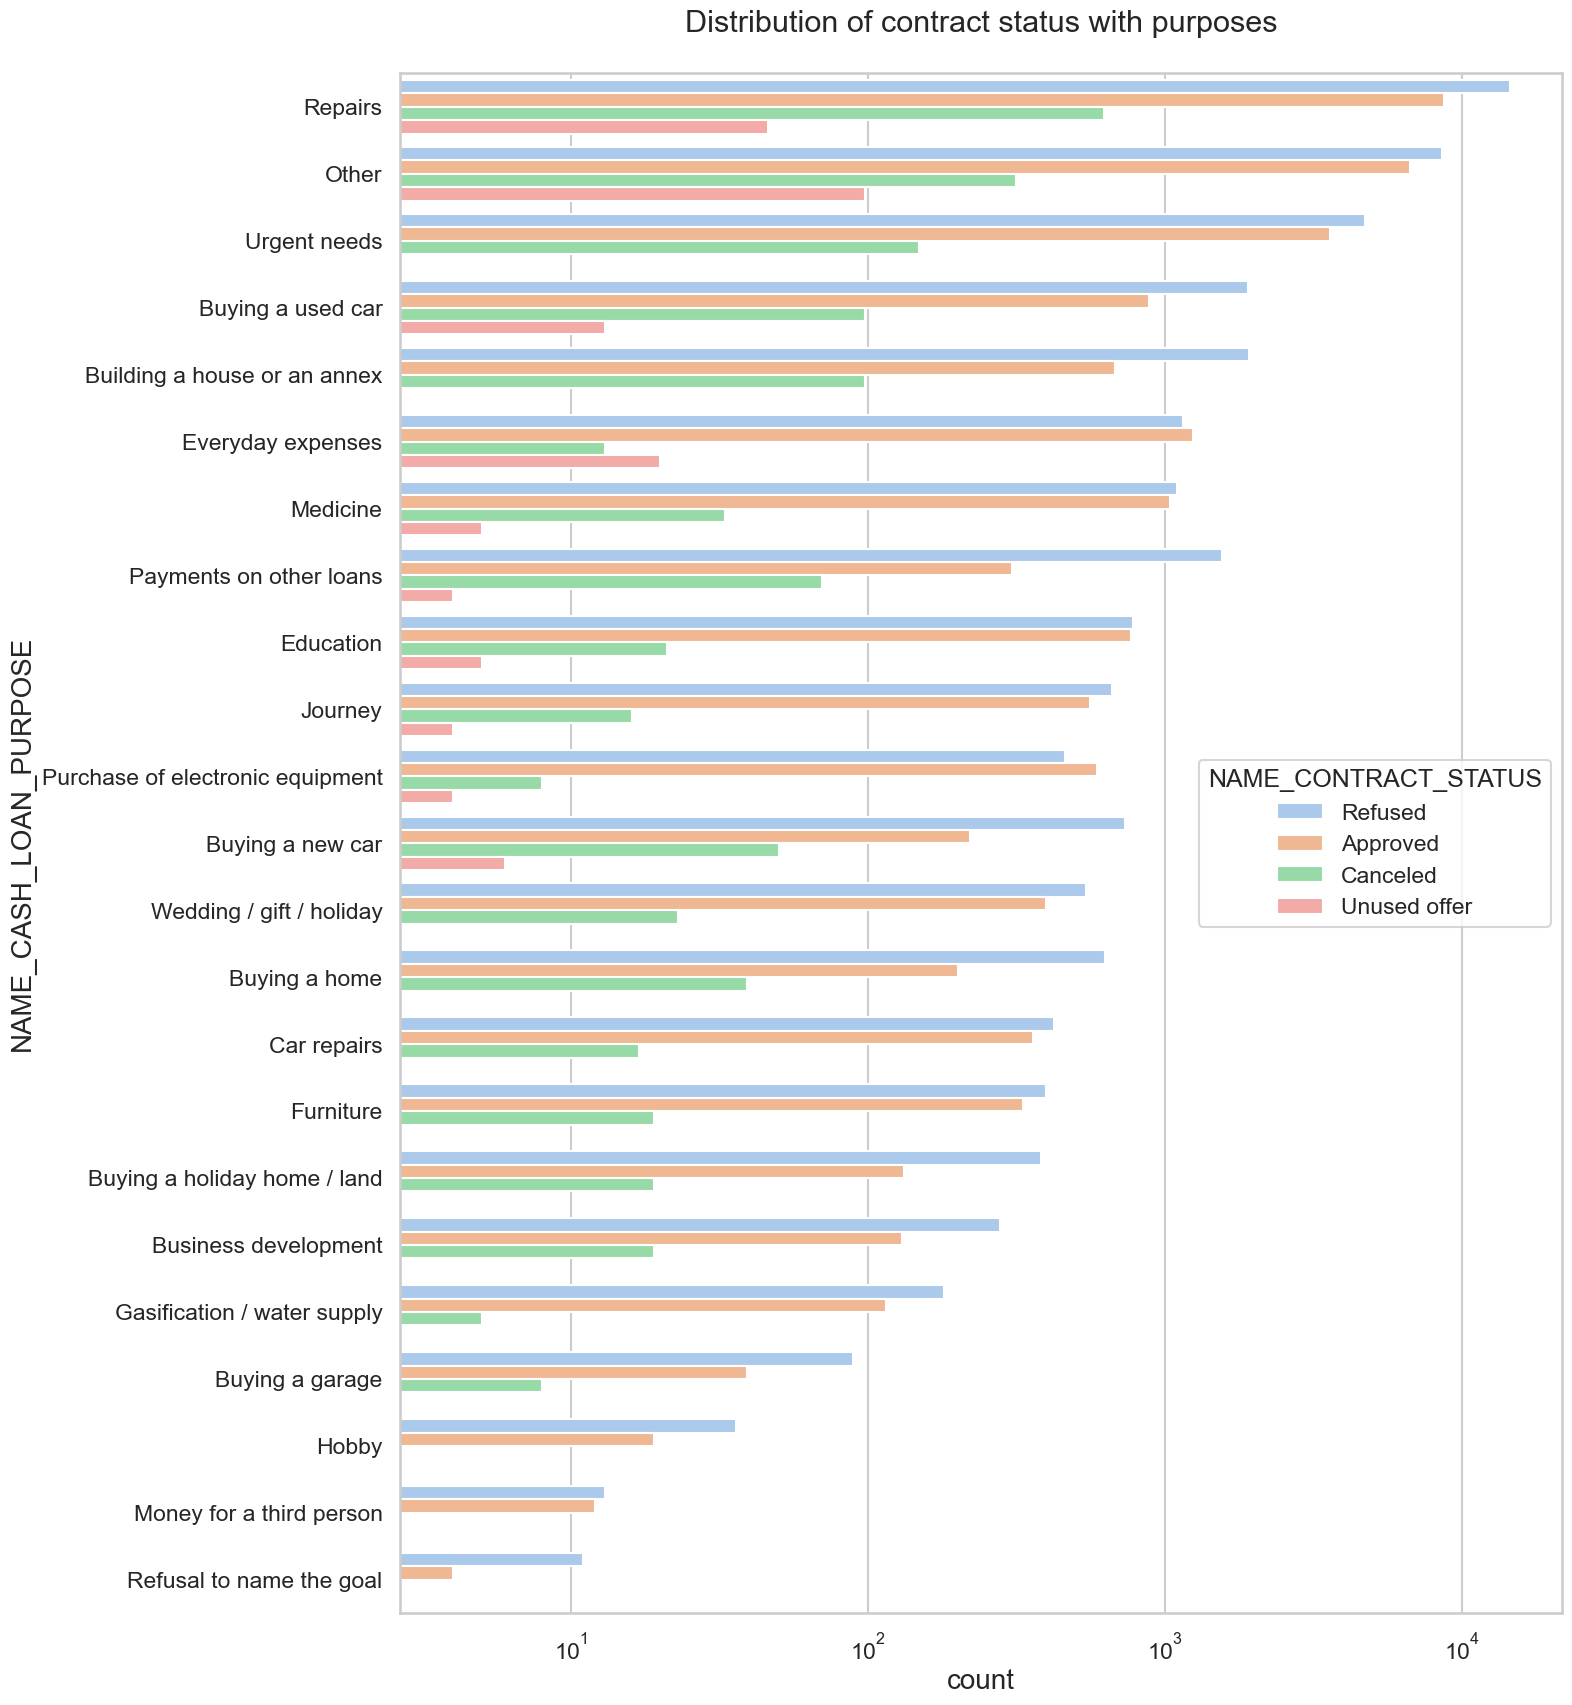

In [112]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,20))

plt.rcParams["axes.labelsize"] = 20 
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = prev_data, y= 'NAME_CASH_LOAN_PURPOSE', order=prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')

### Plot Observation 

#### 1. Repairs is where most loan rejections are identified
#### 2. Buying a new car and payment of other loans have more rejection than approves
#### 3. There are equal number of loan approval and rejection for education

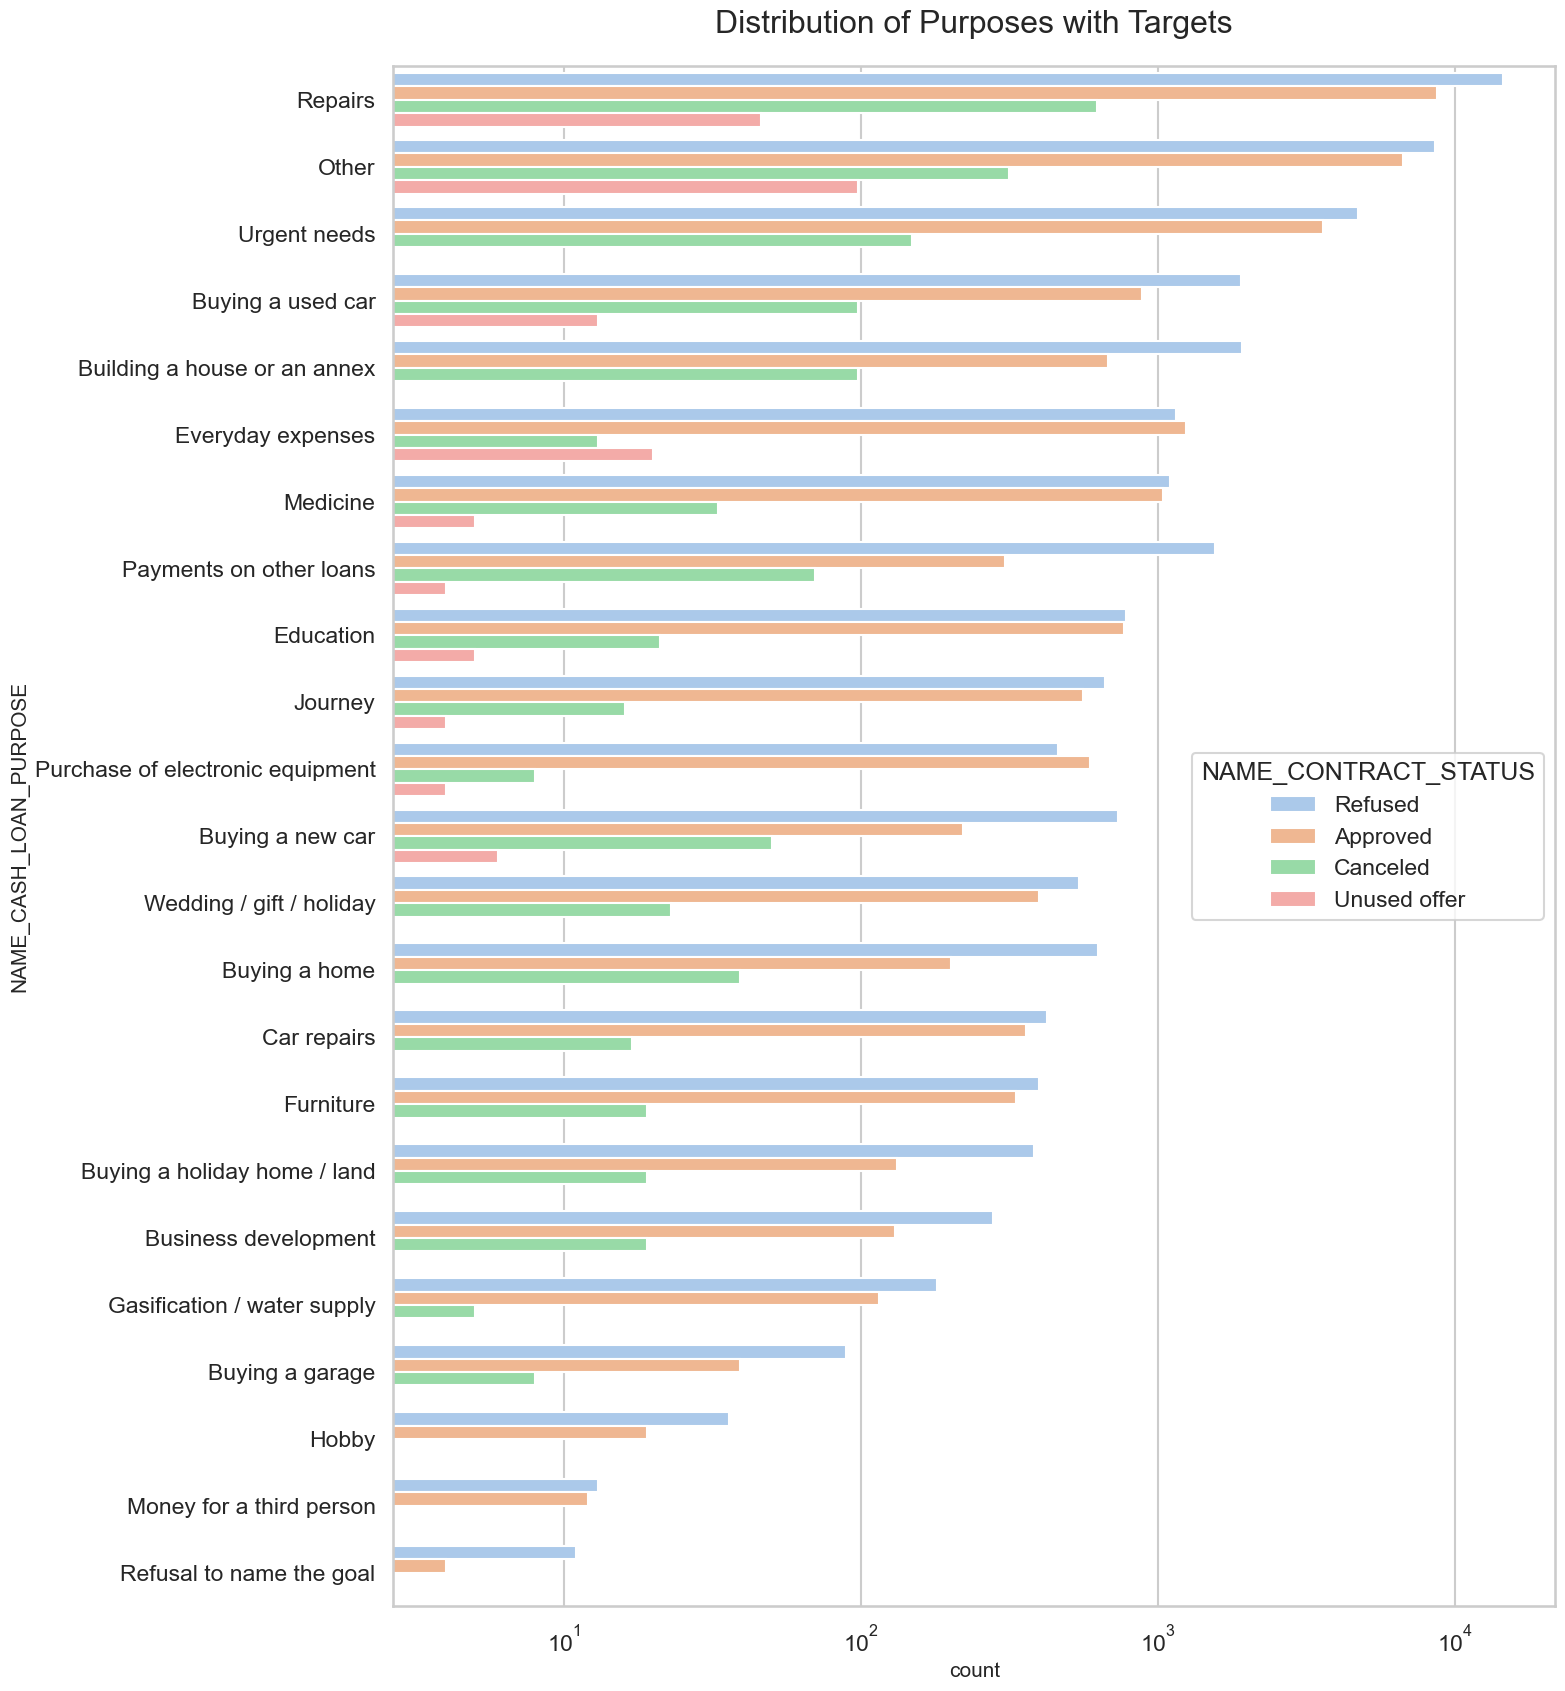

In [113]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,20))

plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 24
plt.xscale('log')
plt.title('Distribution of Purposes with Targets')
ax = sns.countplot(data = prev_data, y= 'NAME_CASH_LOAN_PURPOSE', order=prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')

### Plot Observation
#### Clients who take out loans for the purpose of 'Repairs' are more likely to face difficulties in making timely payments. On the other hand, there are a few loan purposes where the payment performance is significantly higher compared to facing difficulties. These purposes include 'Buying a garage', 'Business development', 'Buying land', 'Buying a new car', and 'Education'. 

#### Therefore, it would be beneficial to focus on providing loans for these purposes to minimize payment difficulties for clients.

## Bivariate Analysis

#### Using boxplots

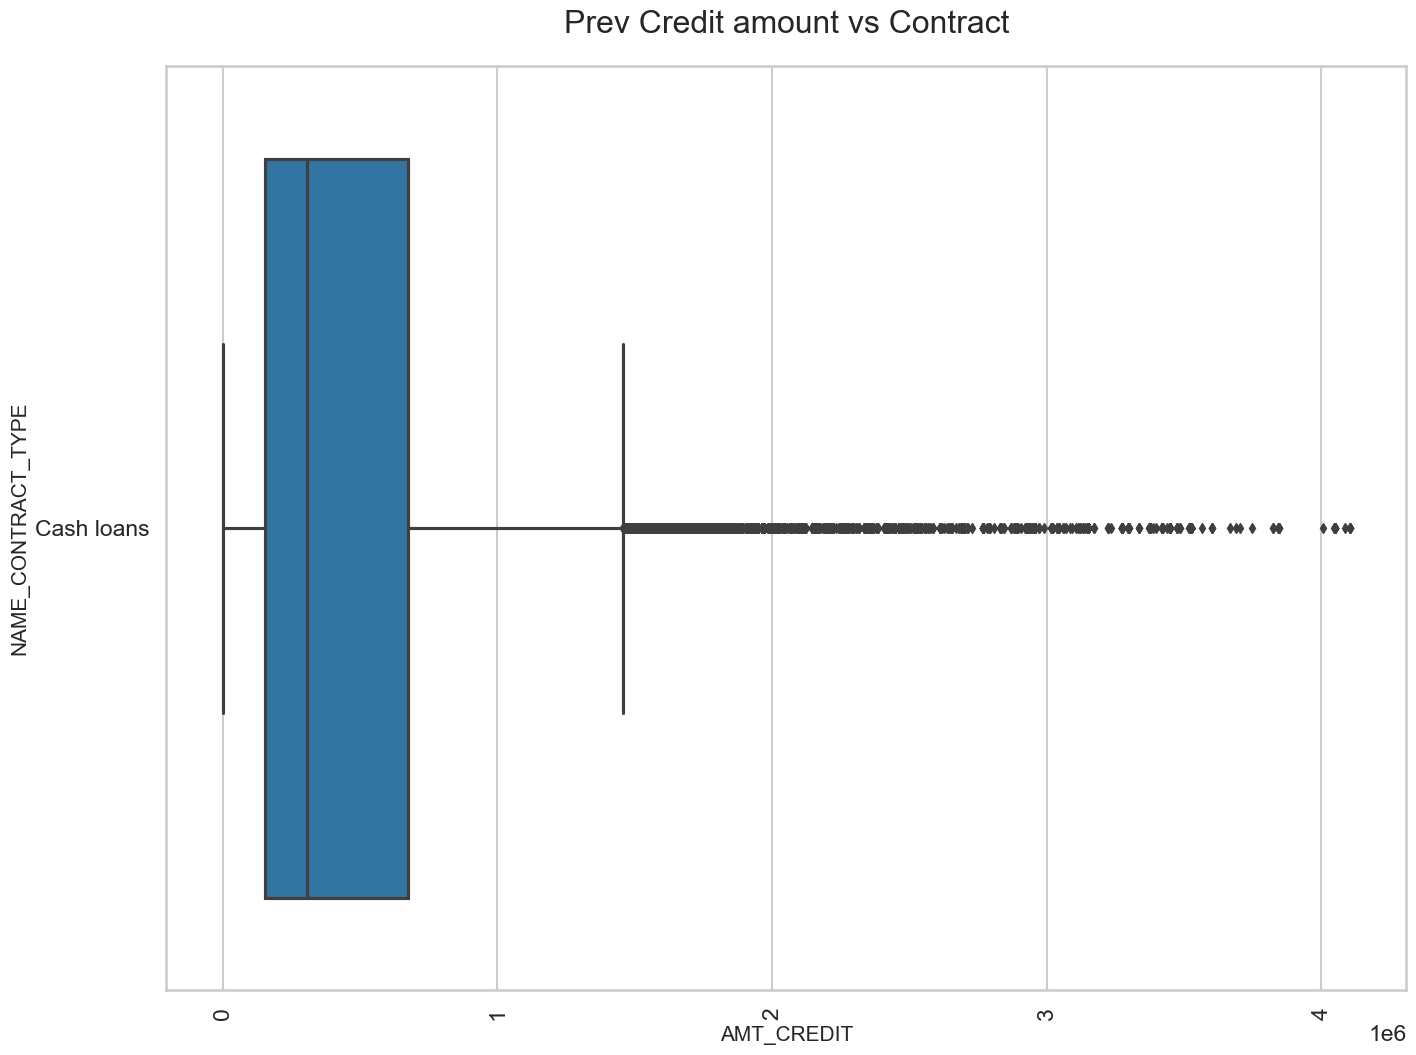

In [132]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(data =prev_data, x='AMT_CREDIT', y='NAME_CONTRACT_TYPE')
plt.title('Prev Credit amount vs Contract')
plt.show()

### Conclusion

#### 1. Some of the key factors are observed are

##### 2. To increase the likelihood of successful payments, banks should prioritize customers with contract types of 'Student', 'Pensioner', and 'Businessman', as well as those who have a housing type other than 'Co-op apartment'.

#### 3. To improve successful loan payments, banks should prioritize clients with contract types 'Student', 'Pensioner', and 'Businessman', and who have housing types other than 'Co-op apartment'. 

#### 4. t is also important to note that loans with the purpose of 'Repair' have a higher number of unsuccessful payments on time. Additionally, banks should try to attract clients from the housing type 'With parents', as they have the least number of unsuccessful payments.